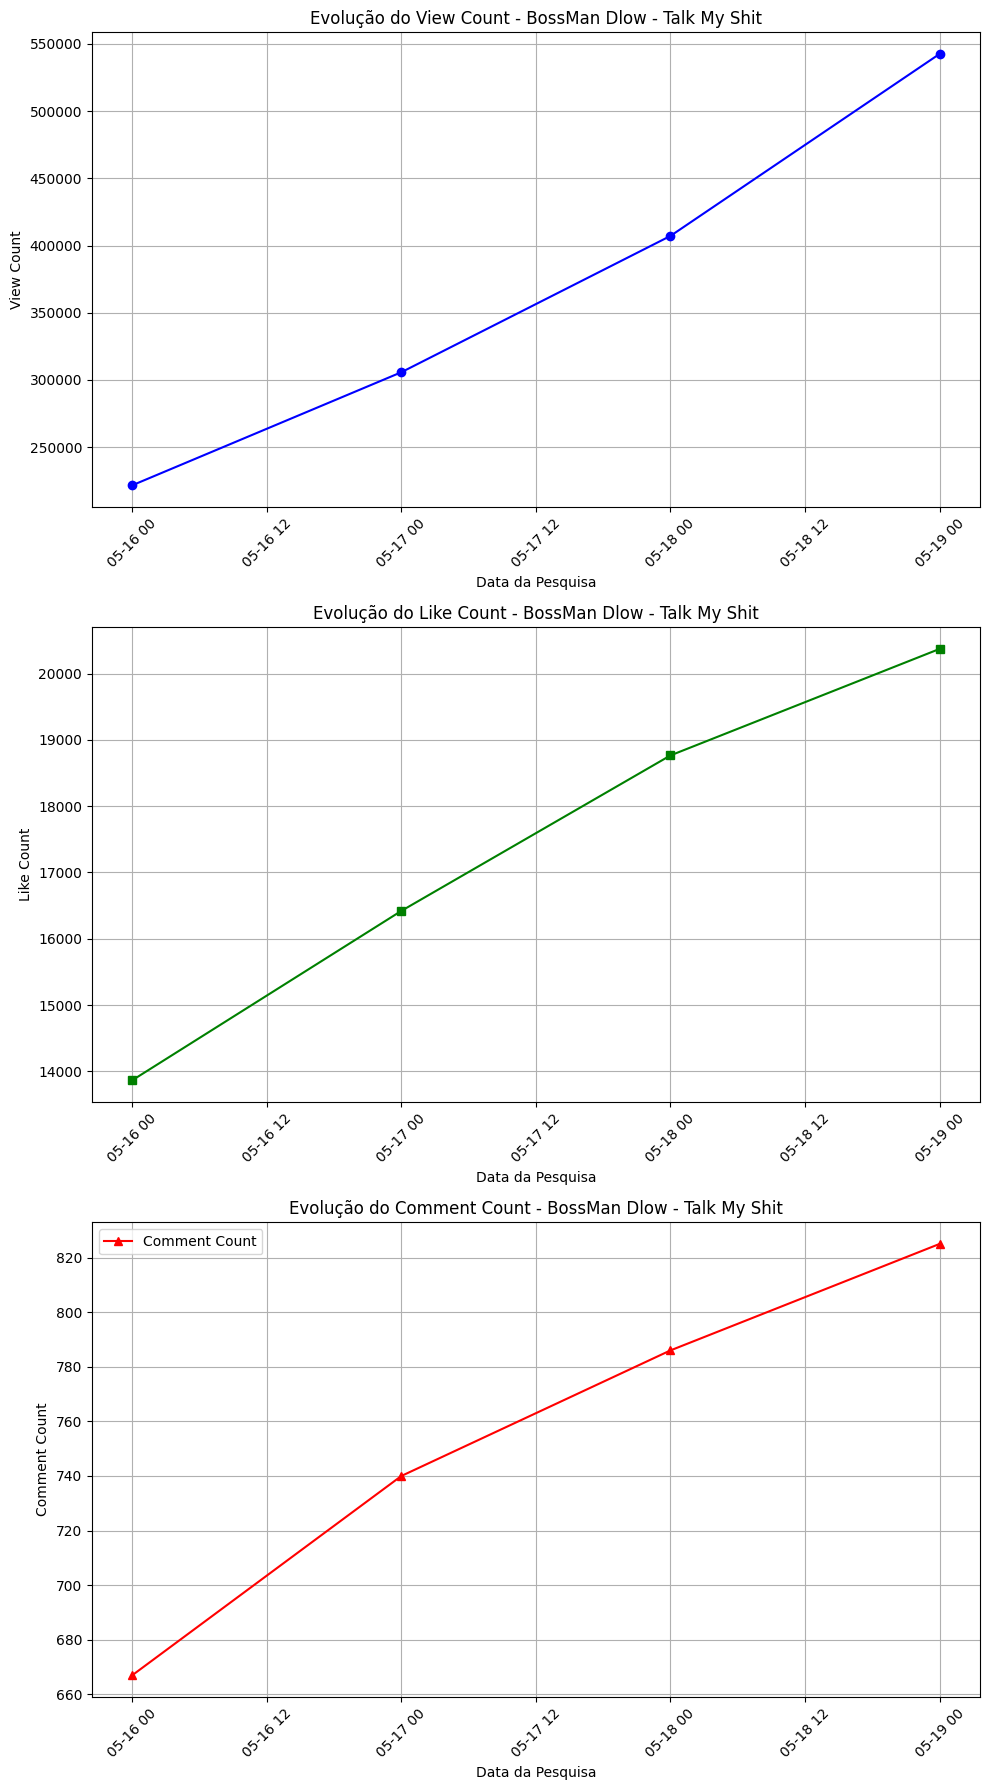

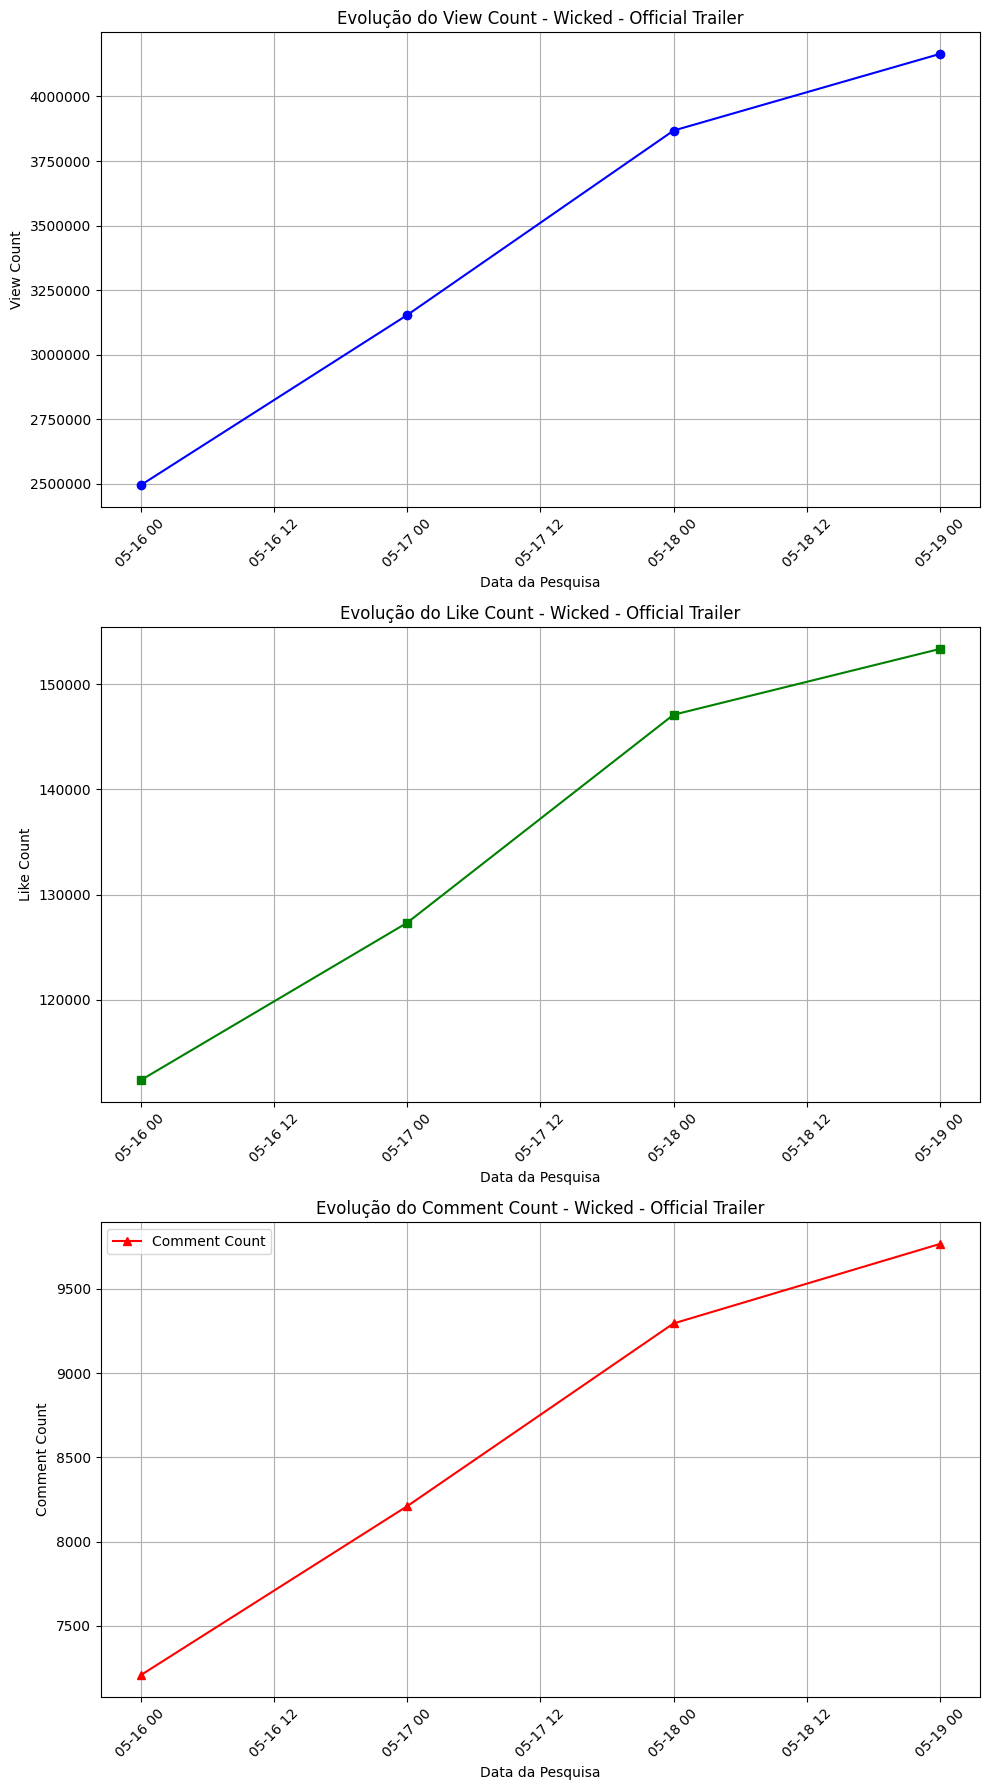

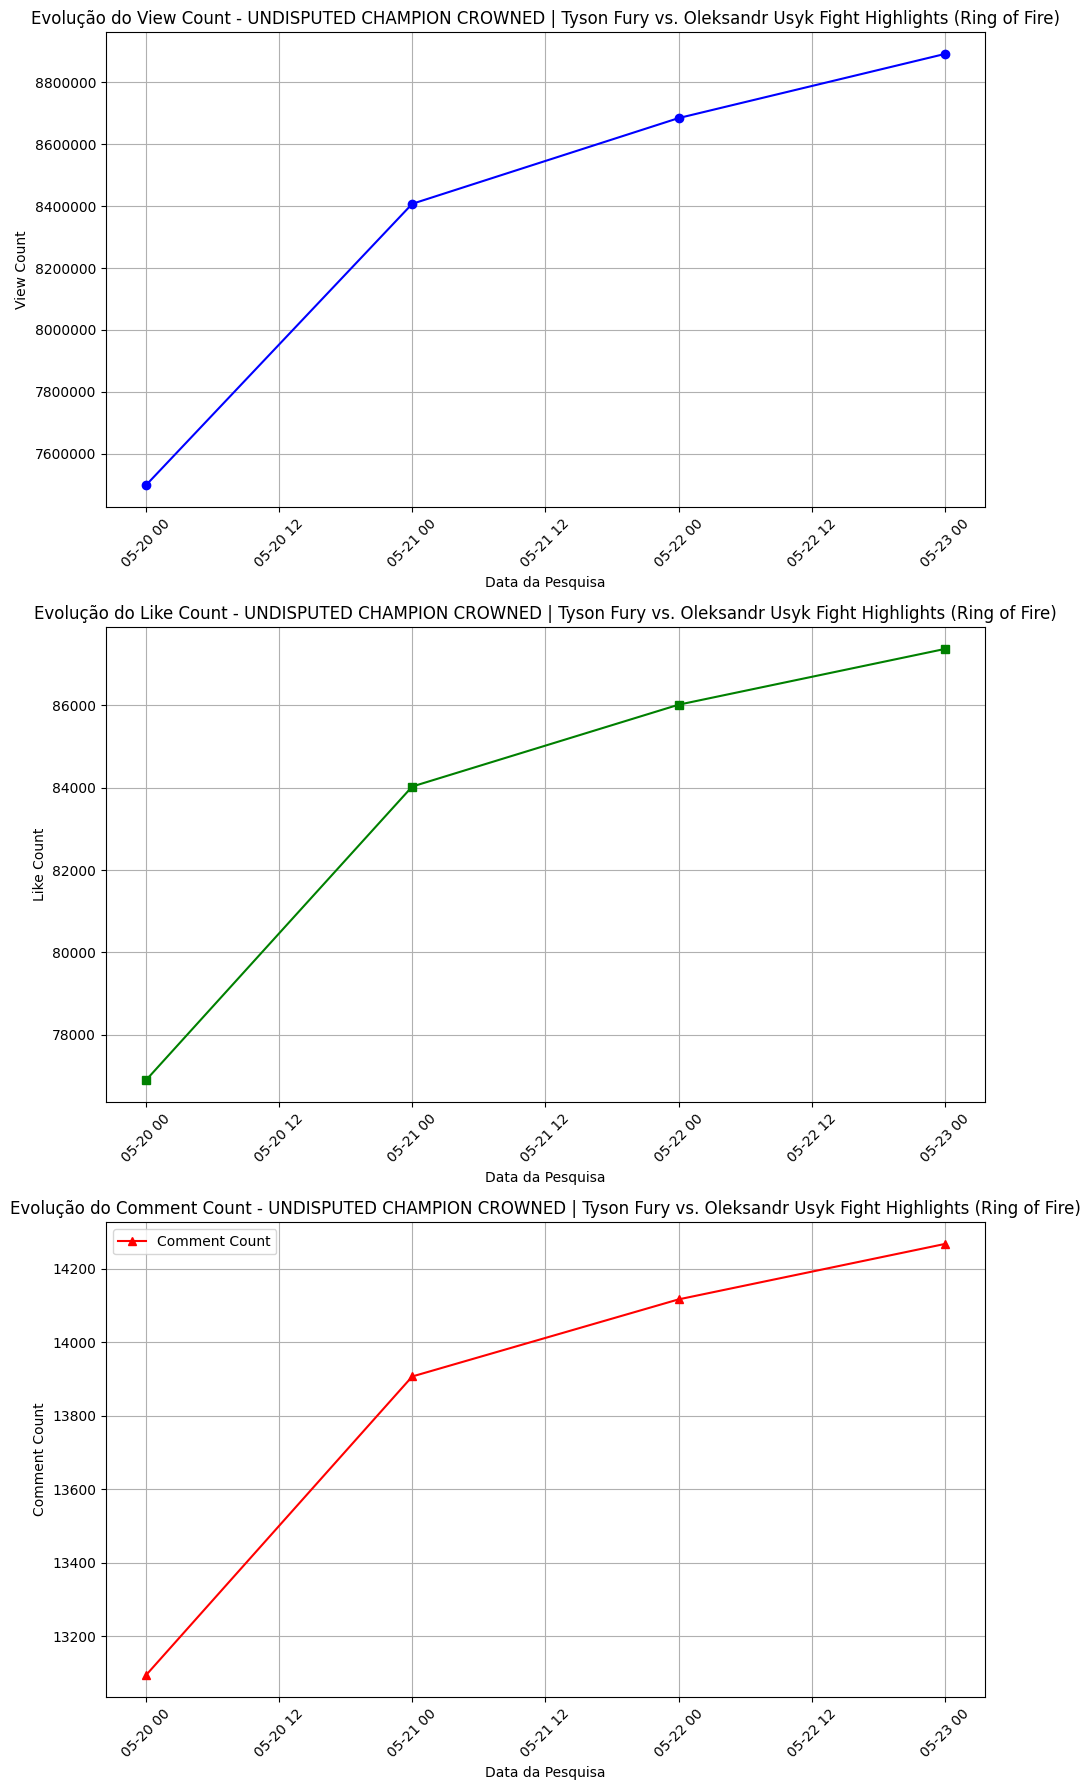

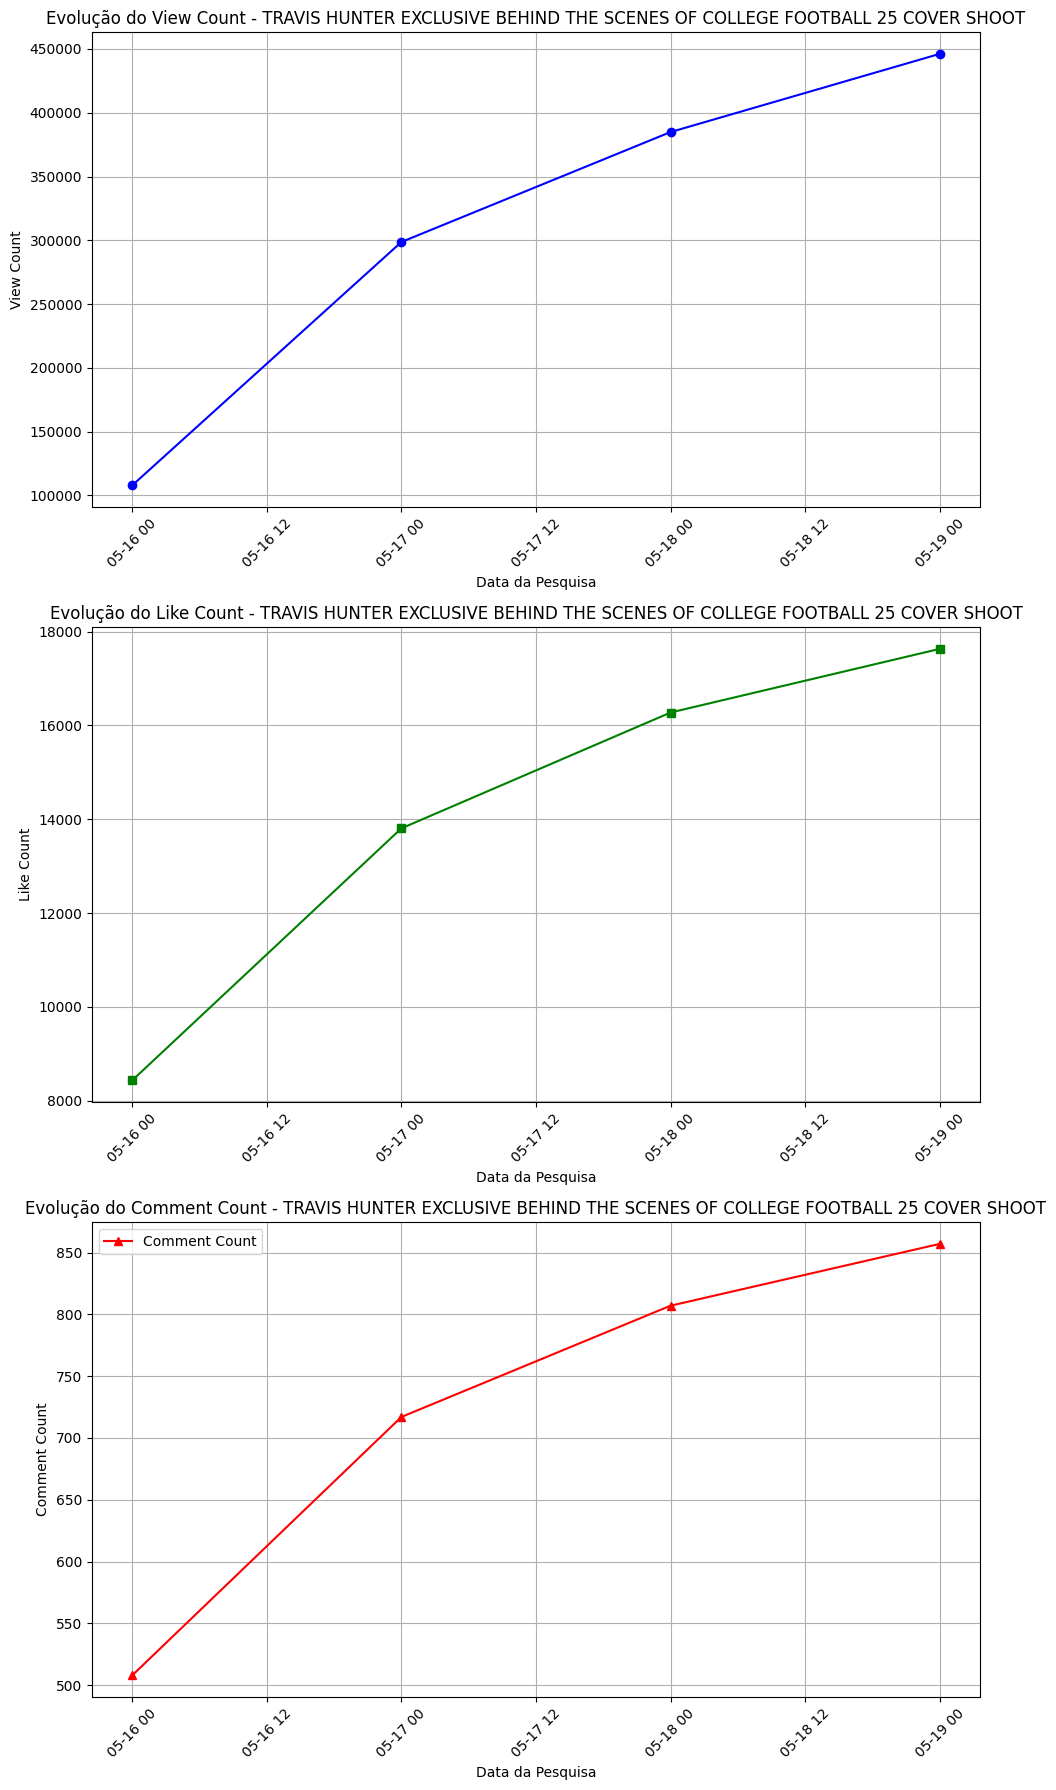

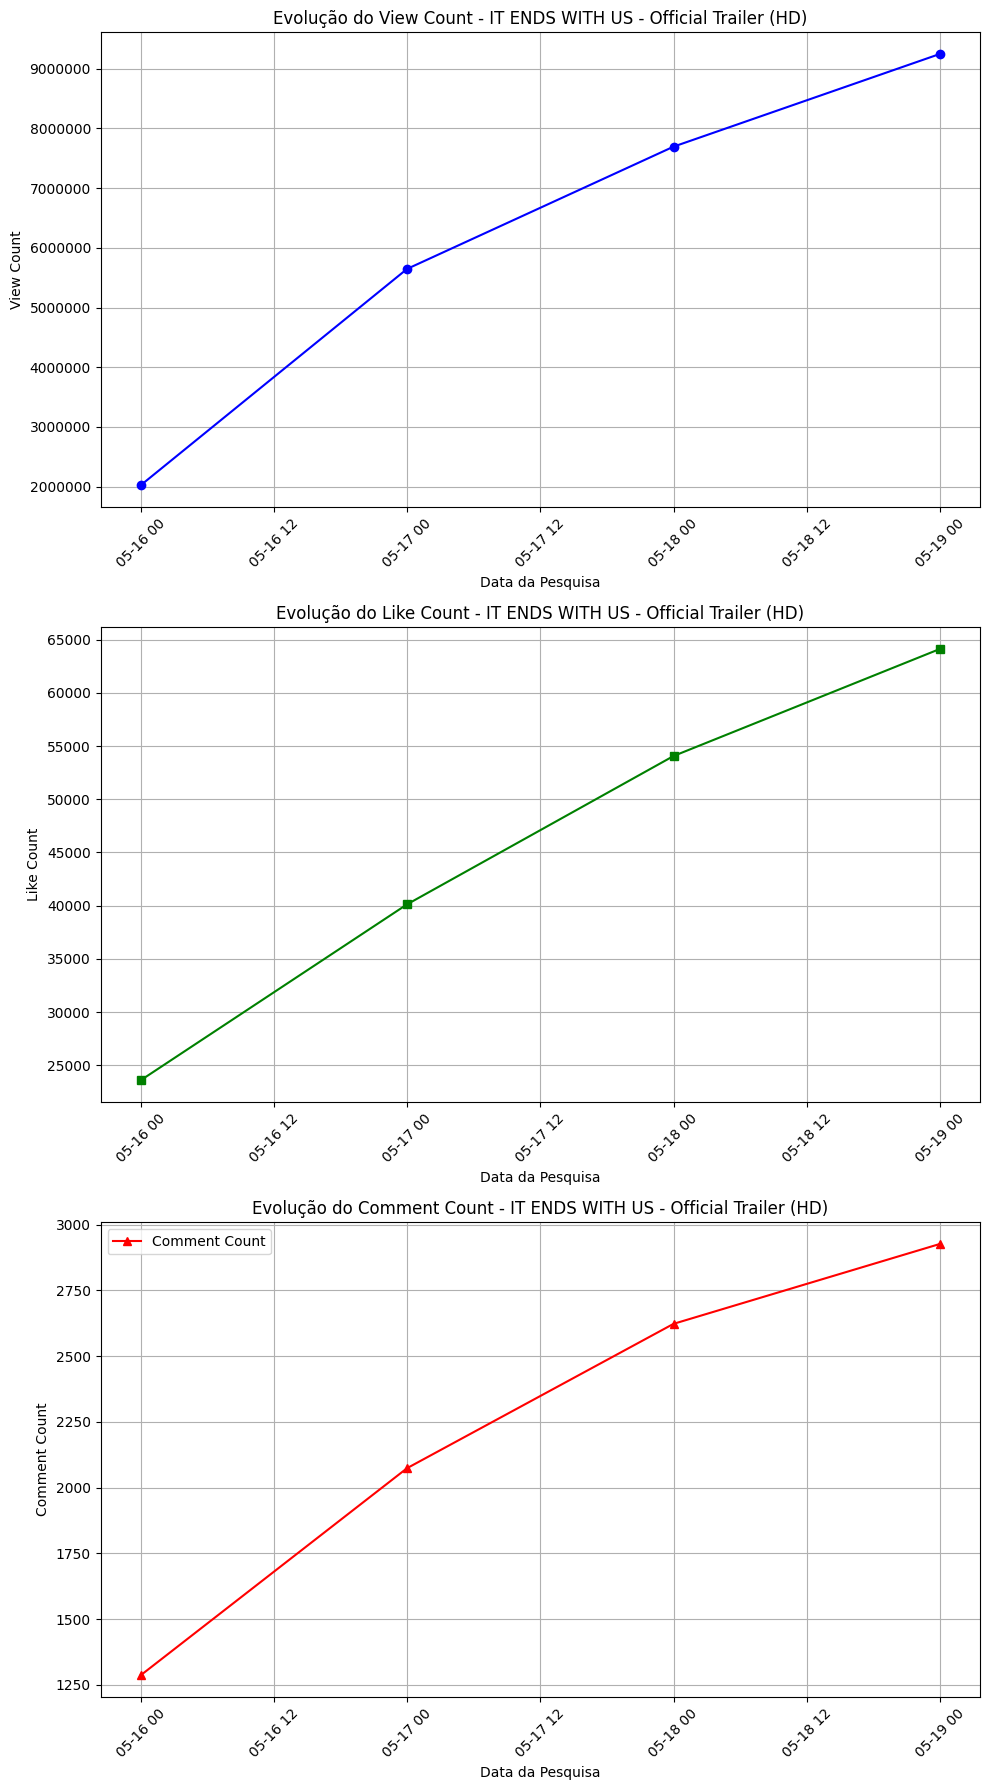

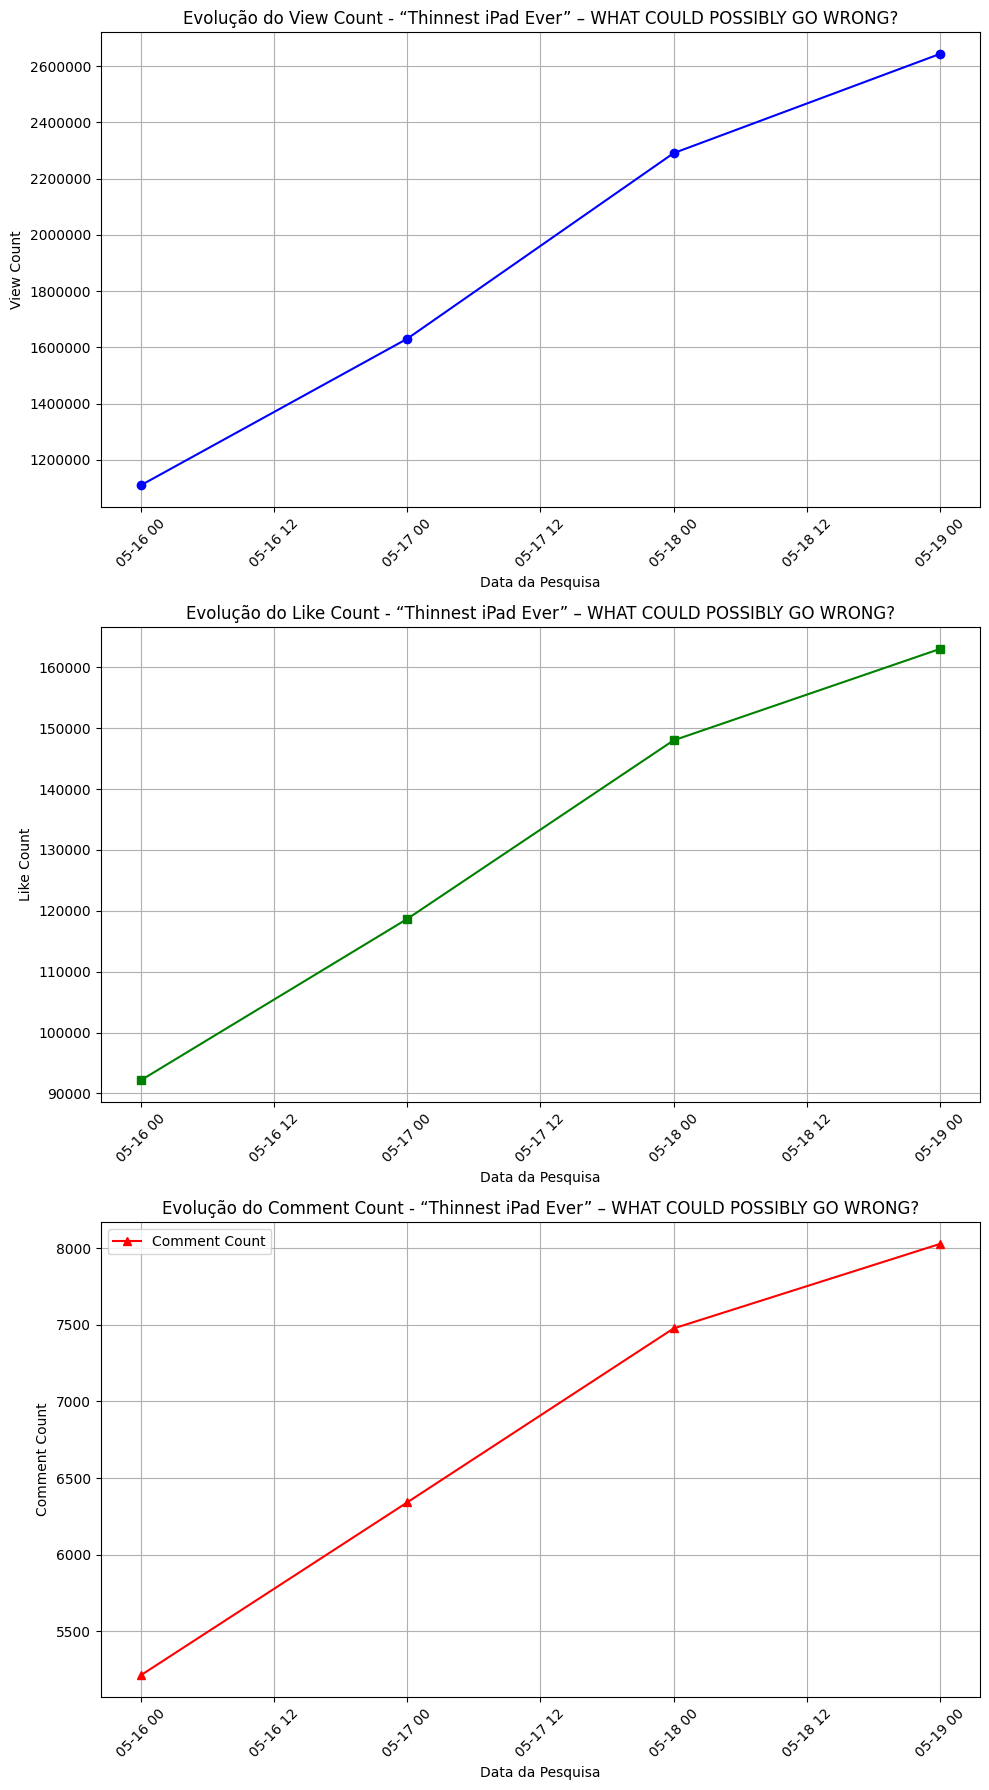

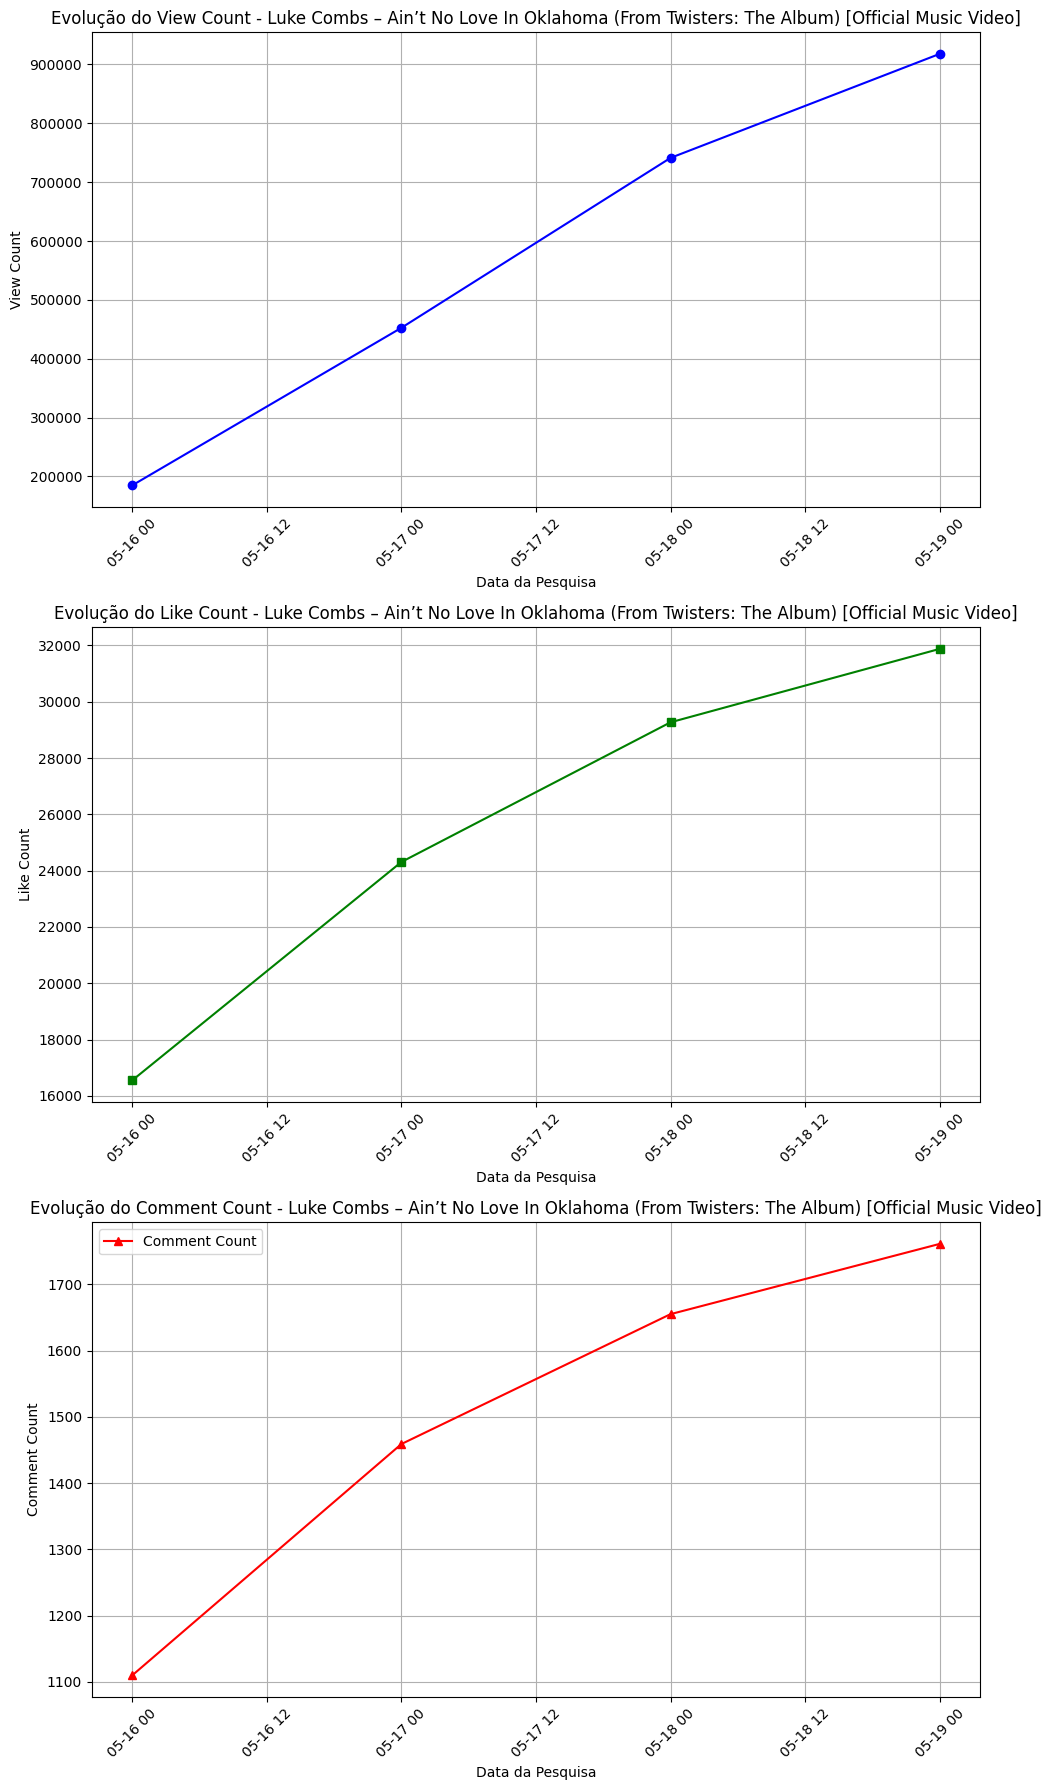

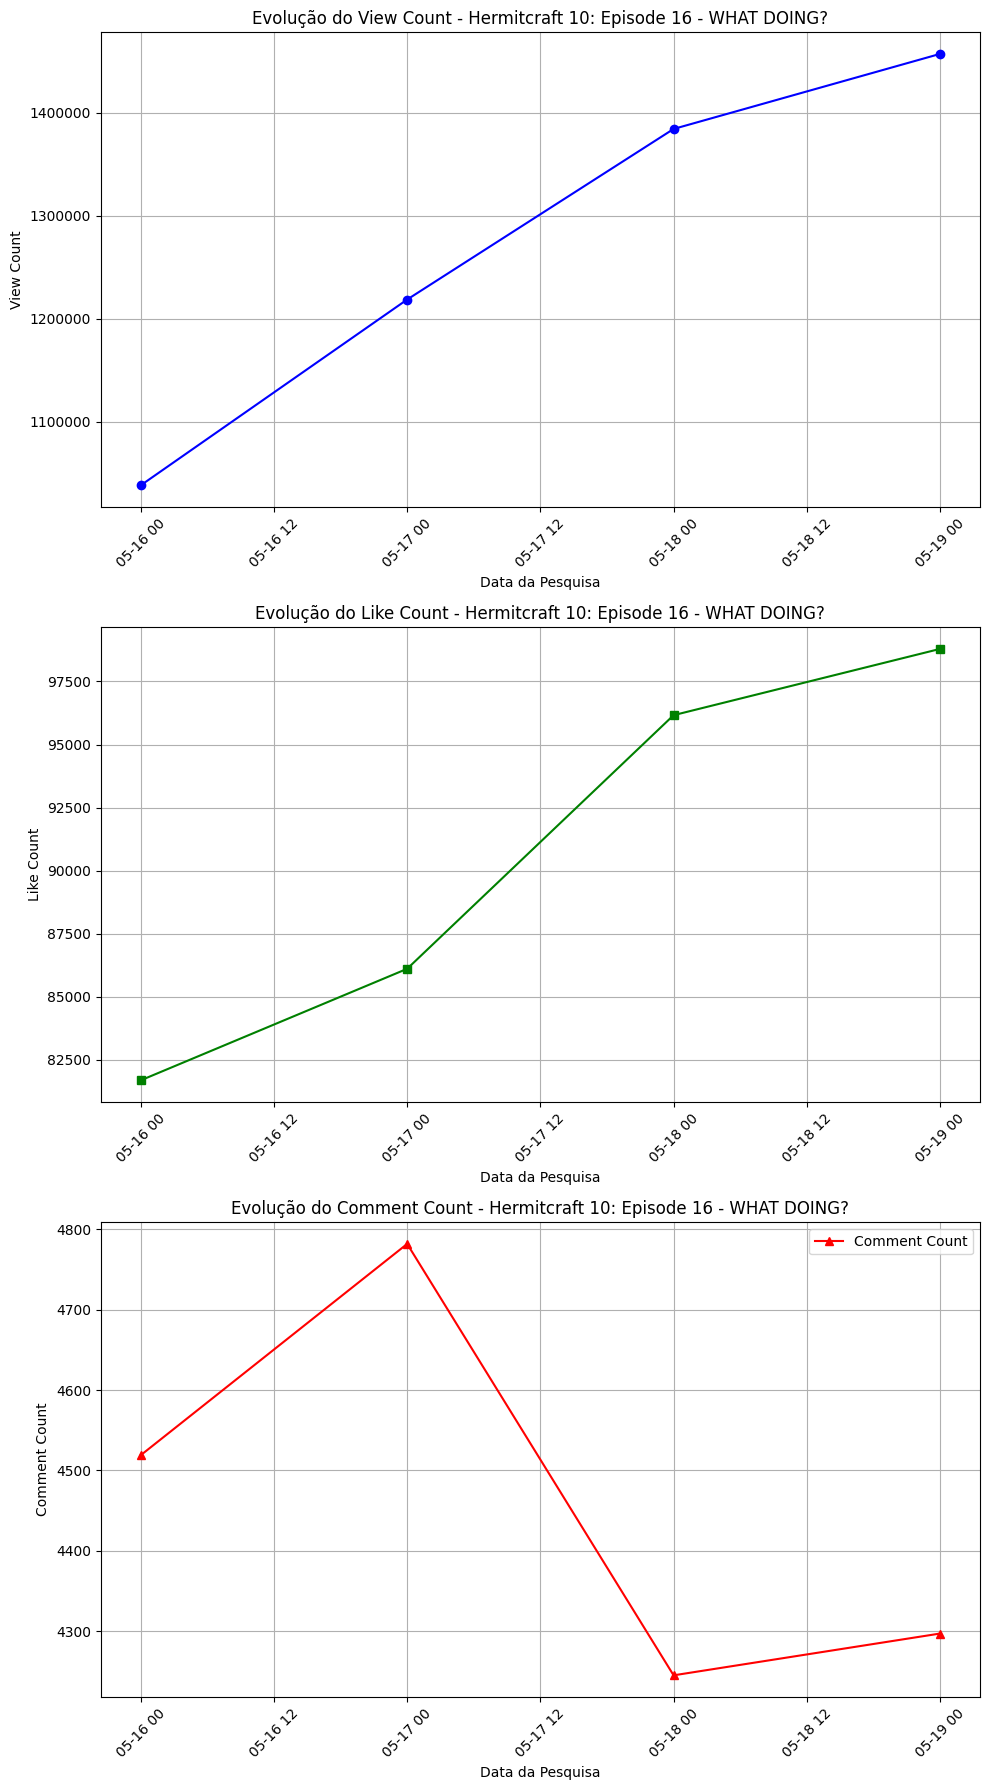

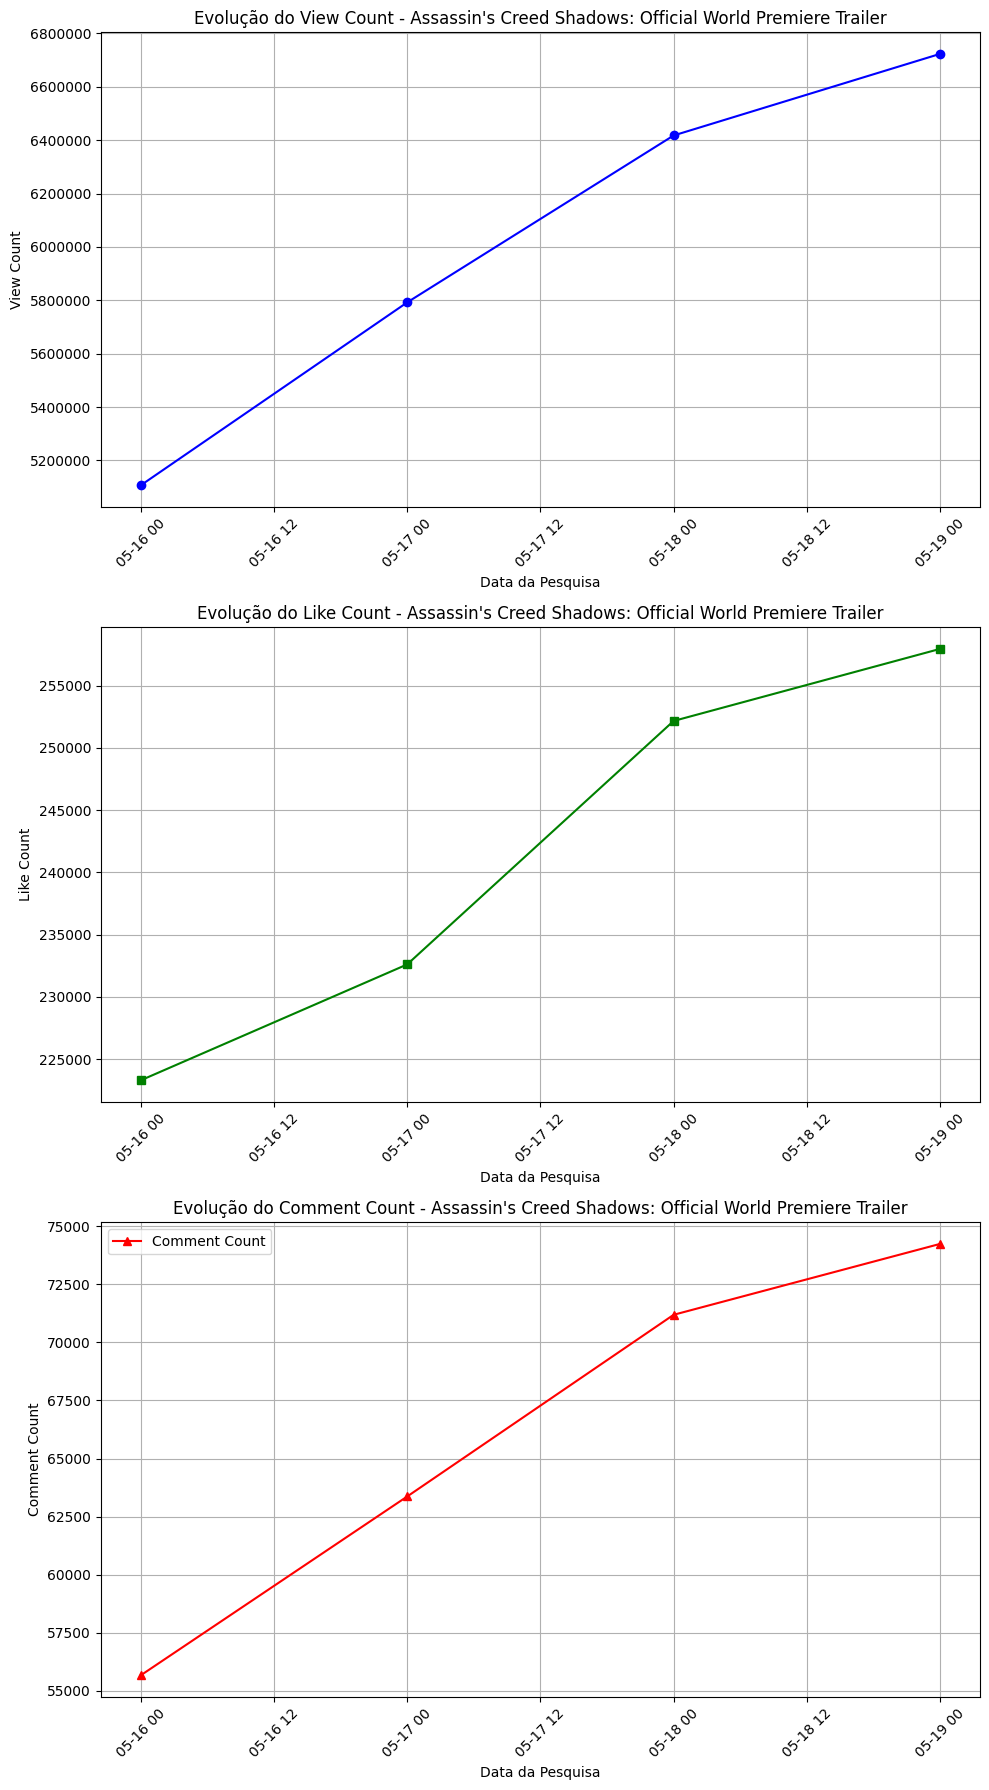

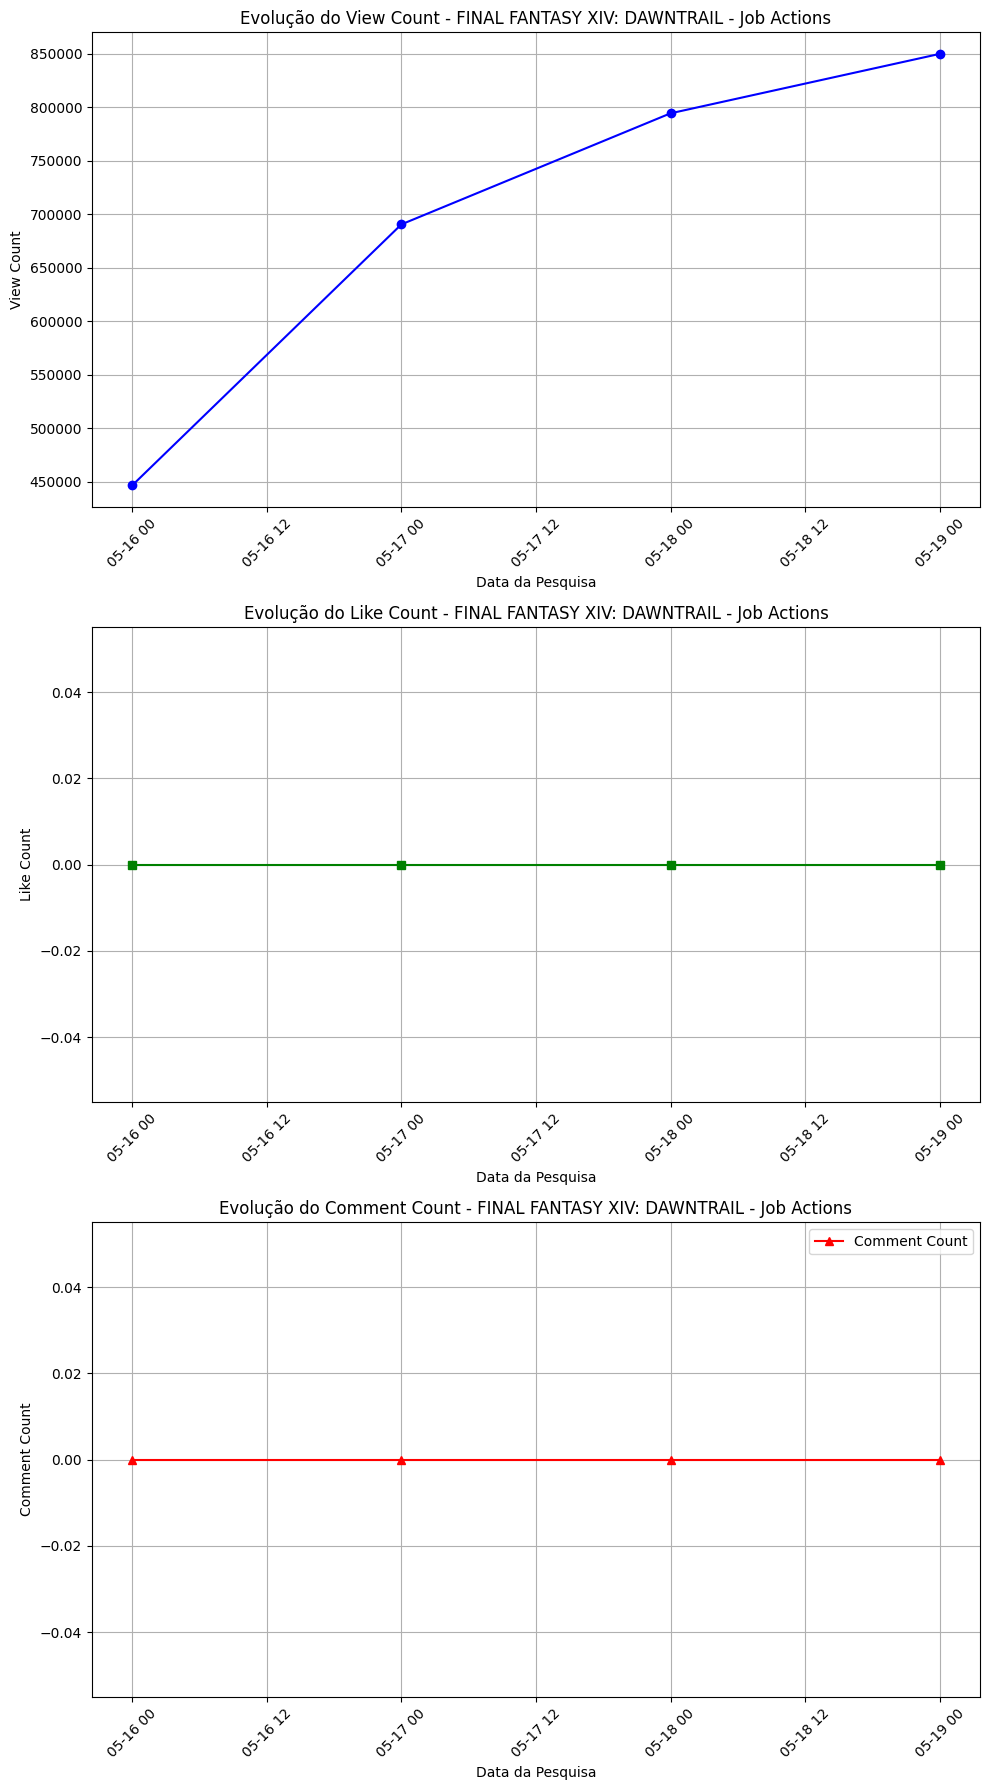

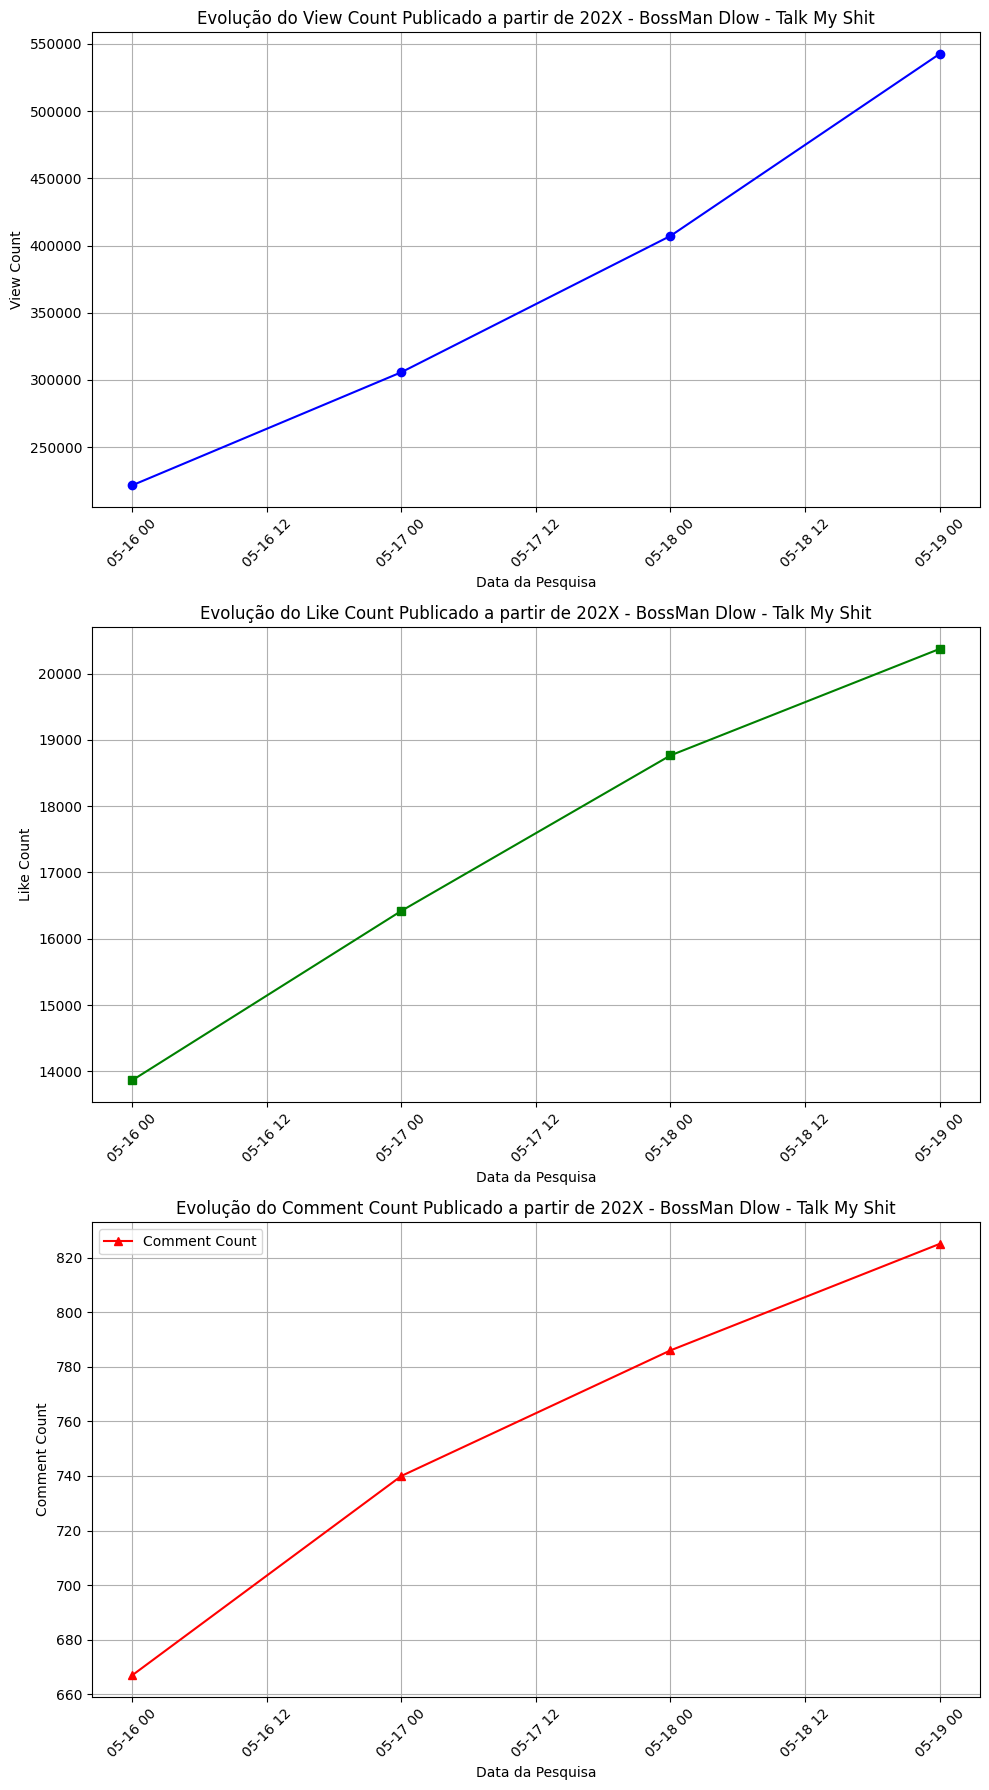

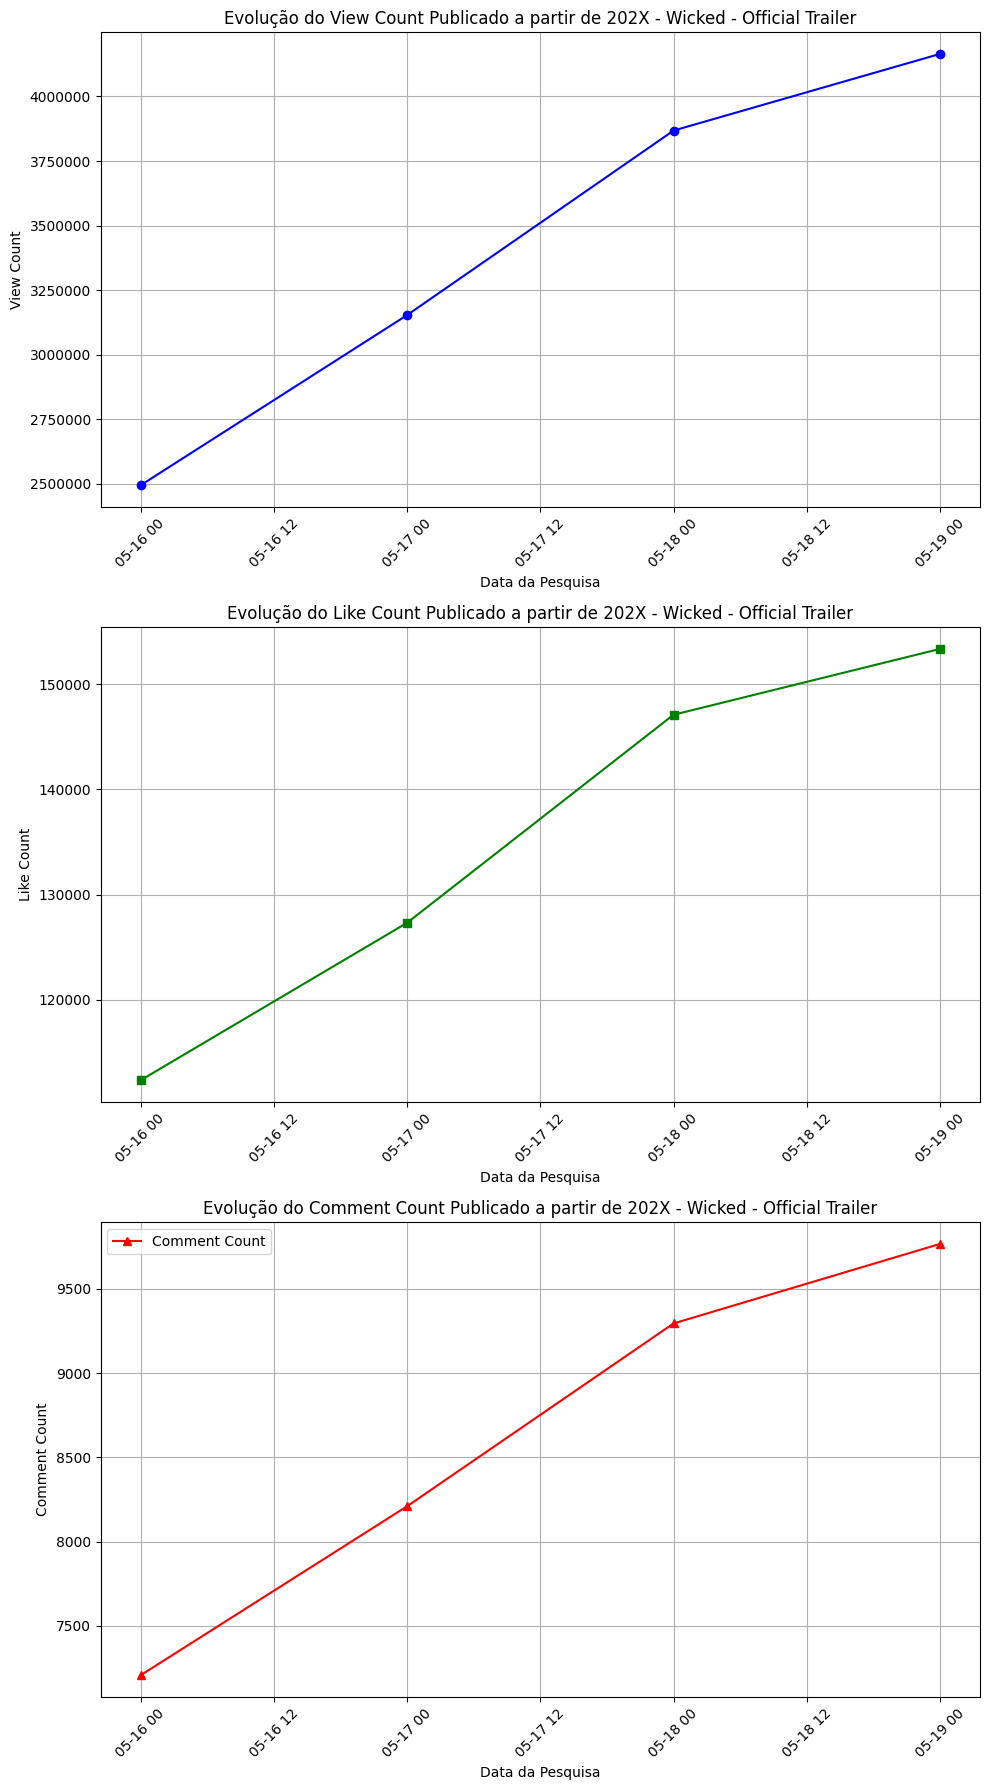

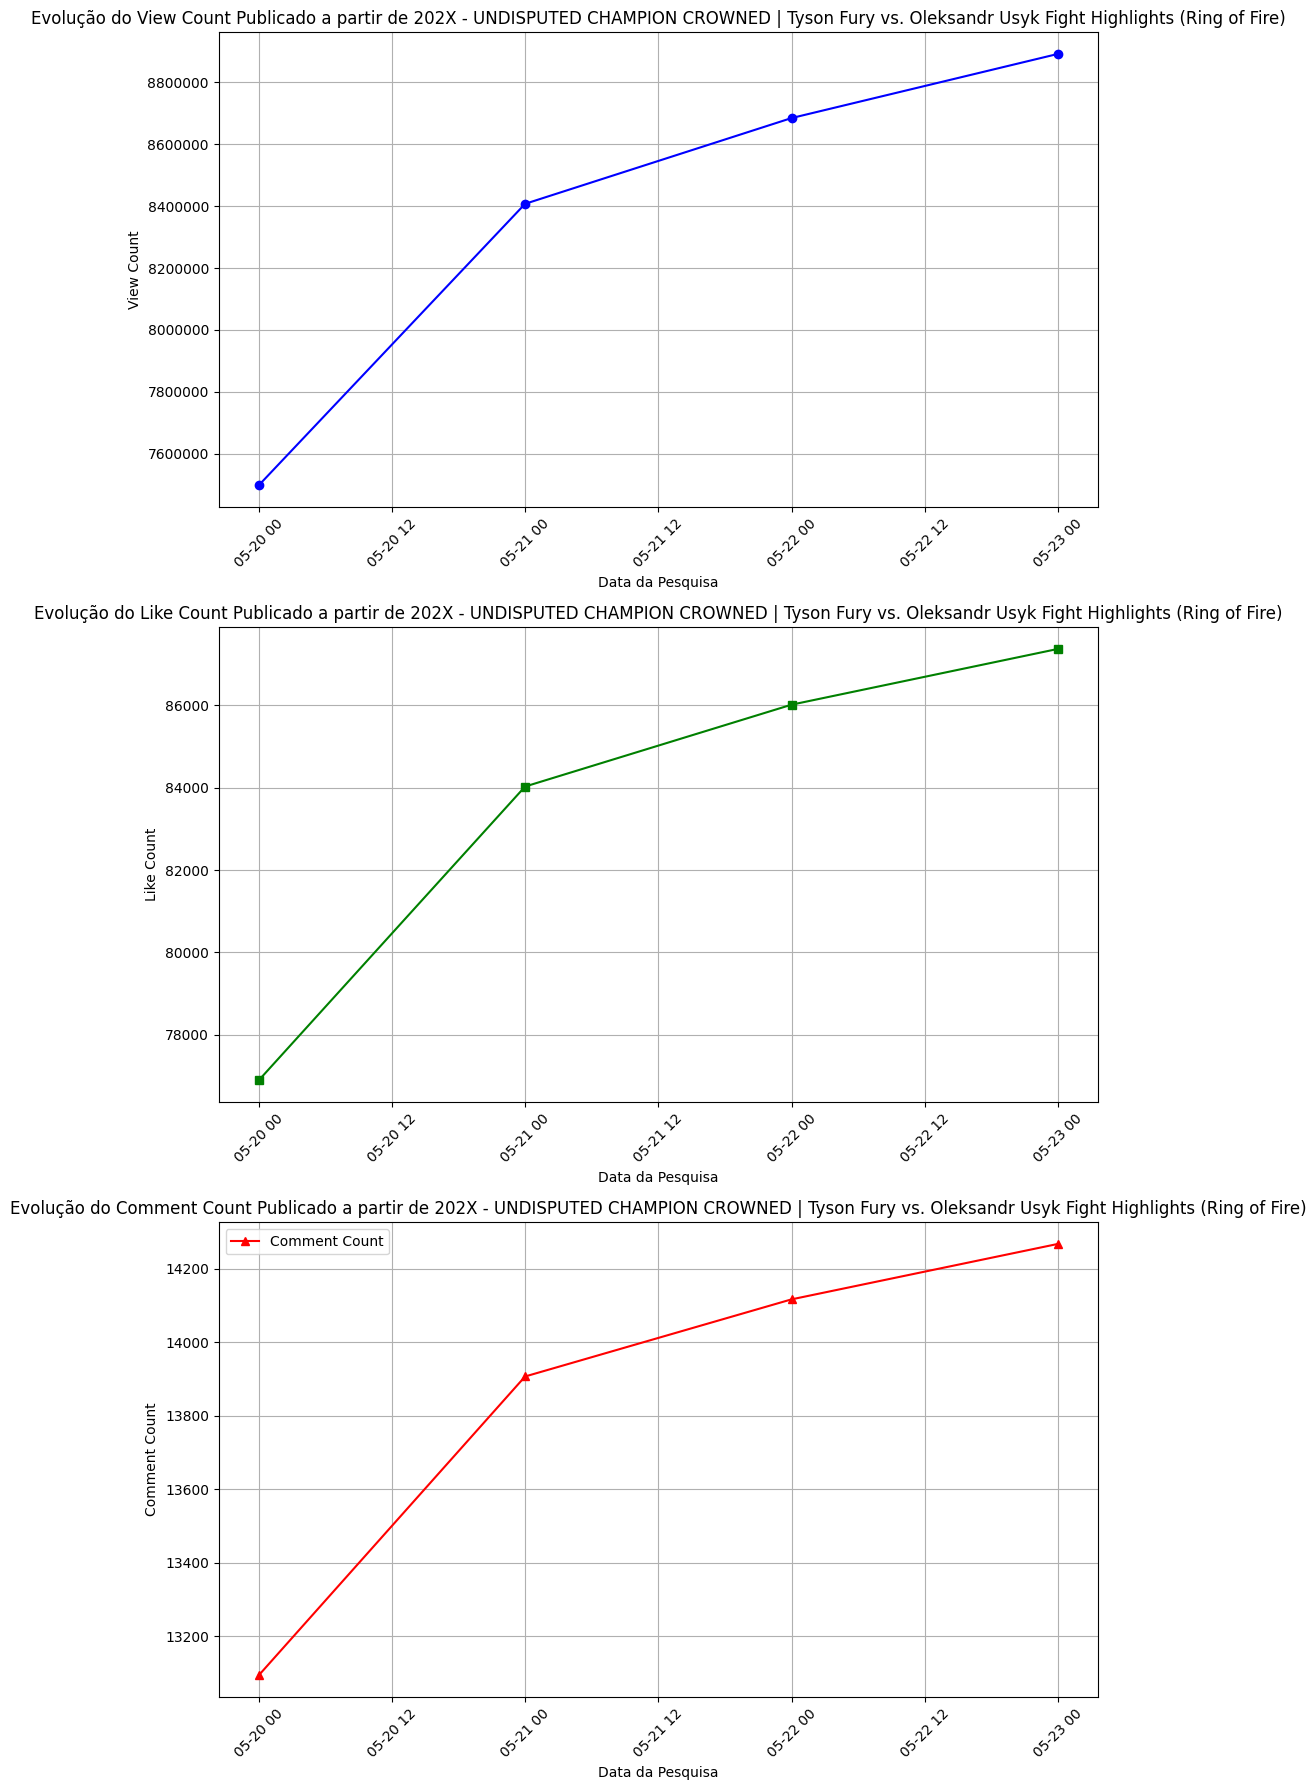

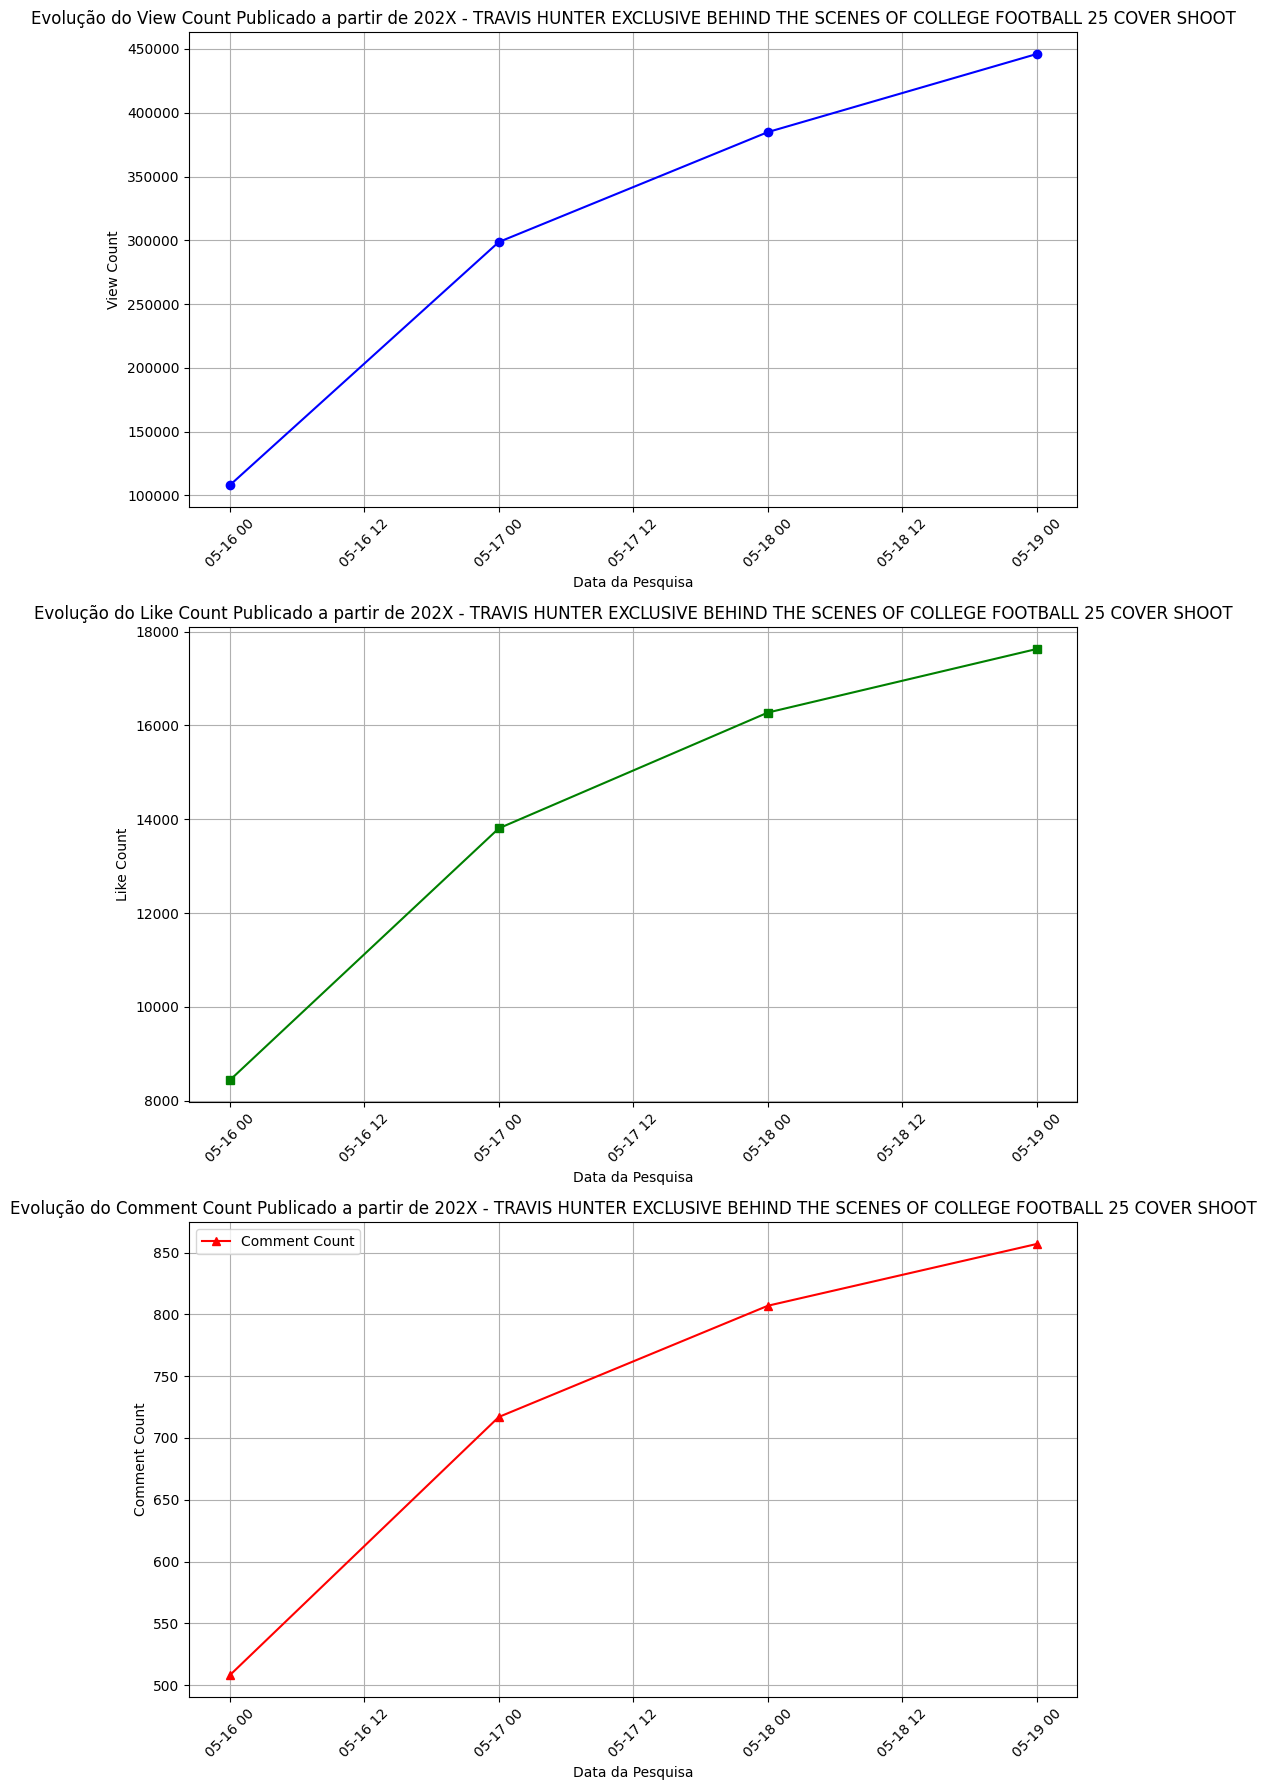

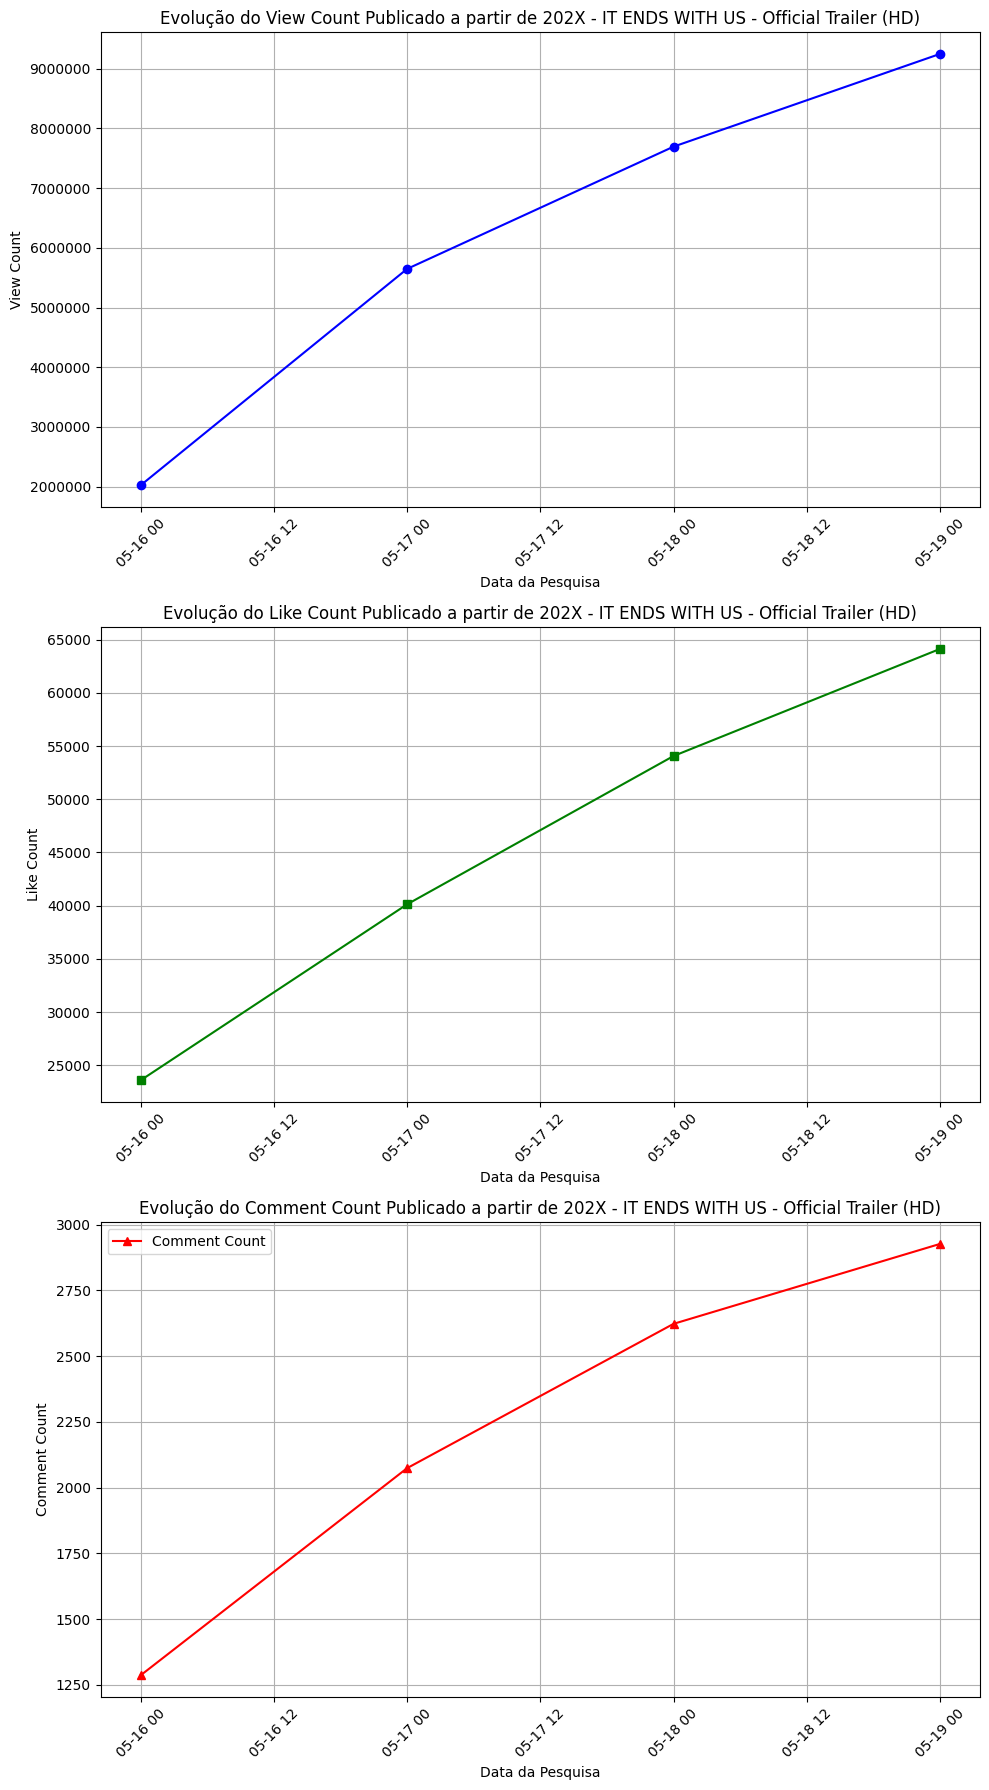

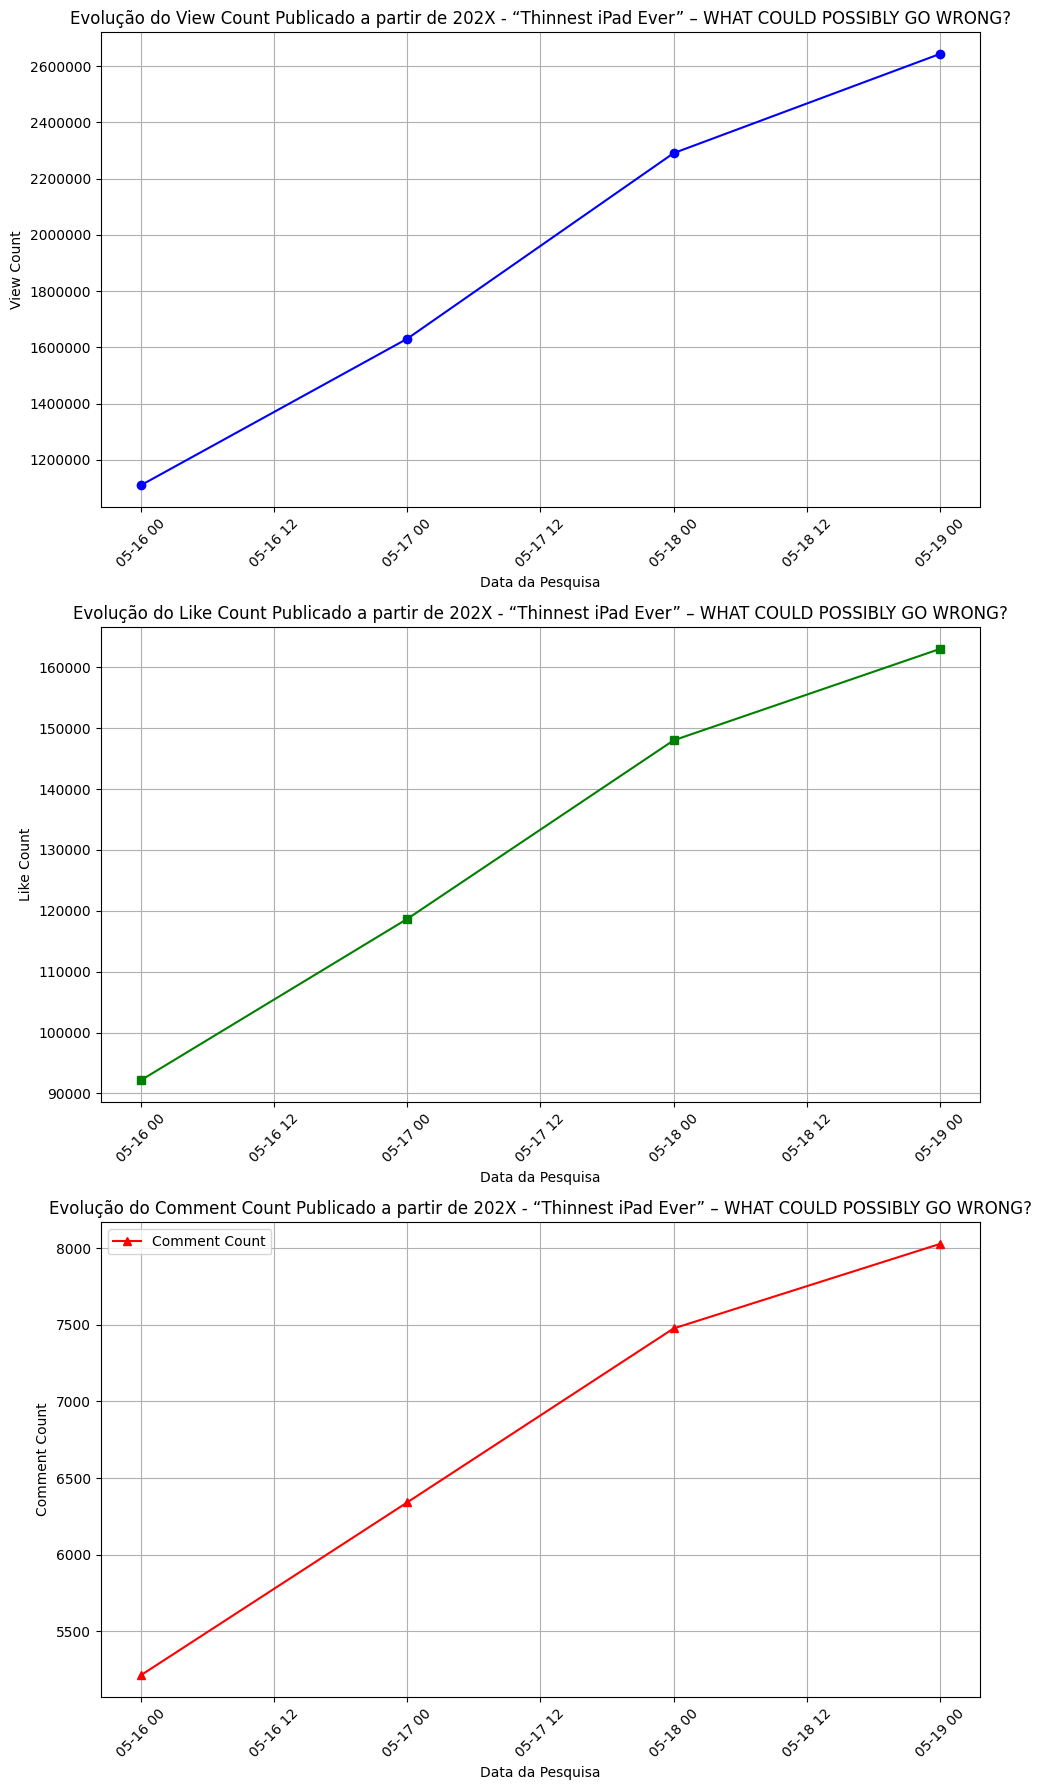

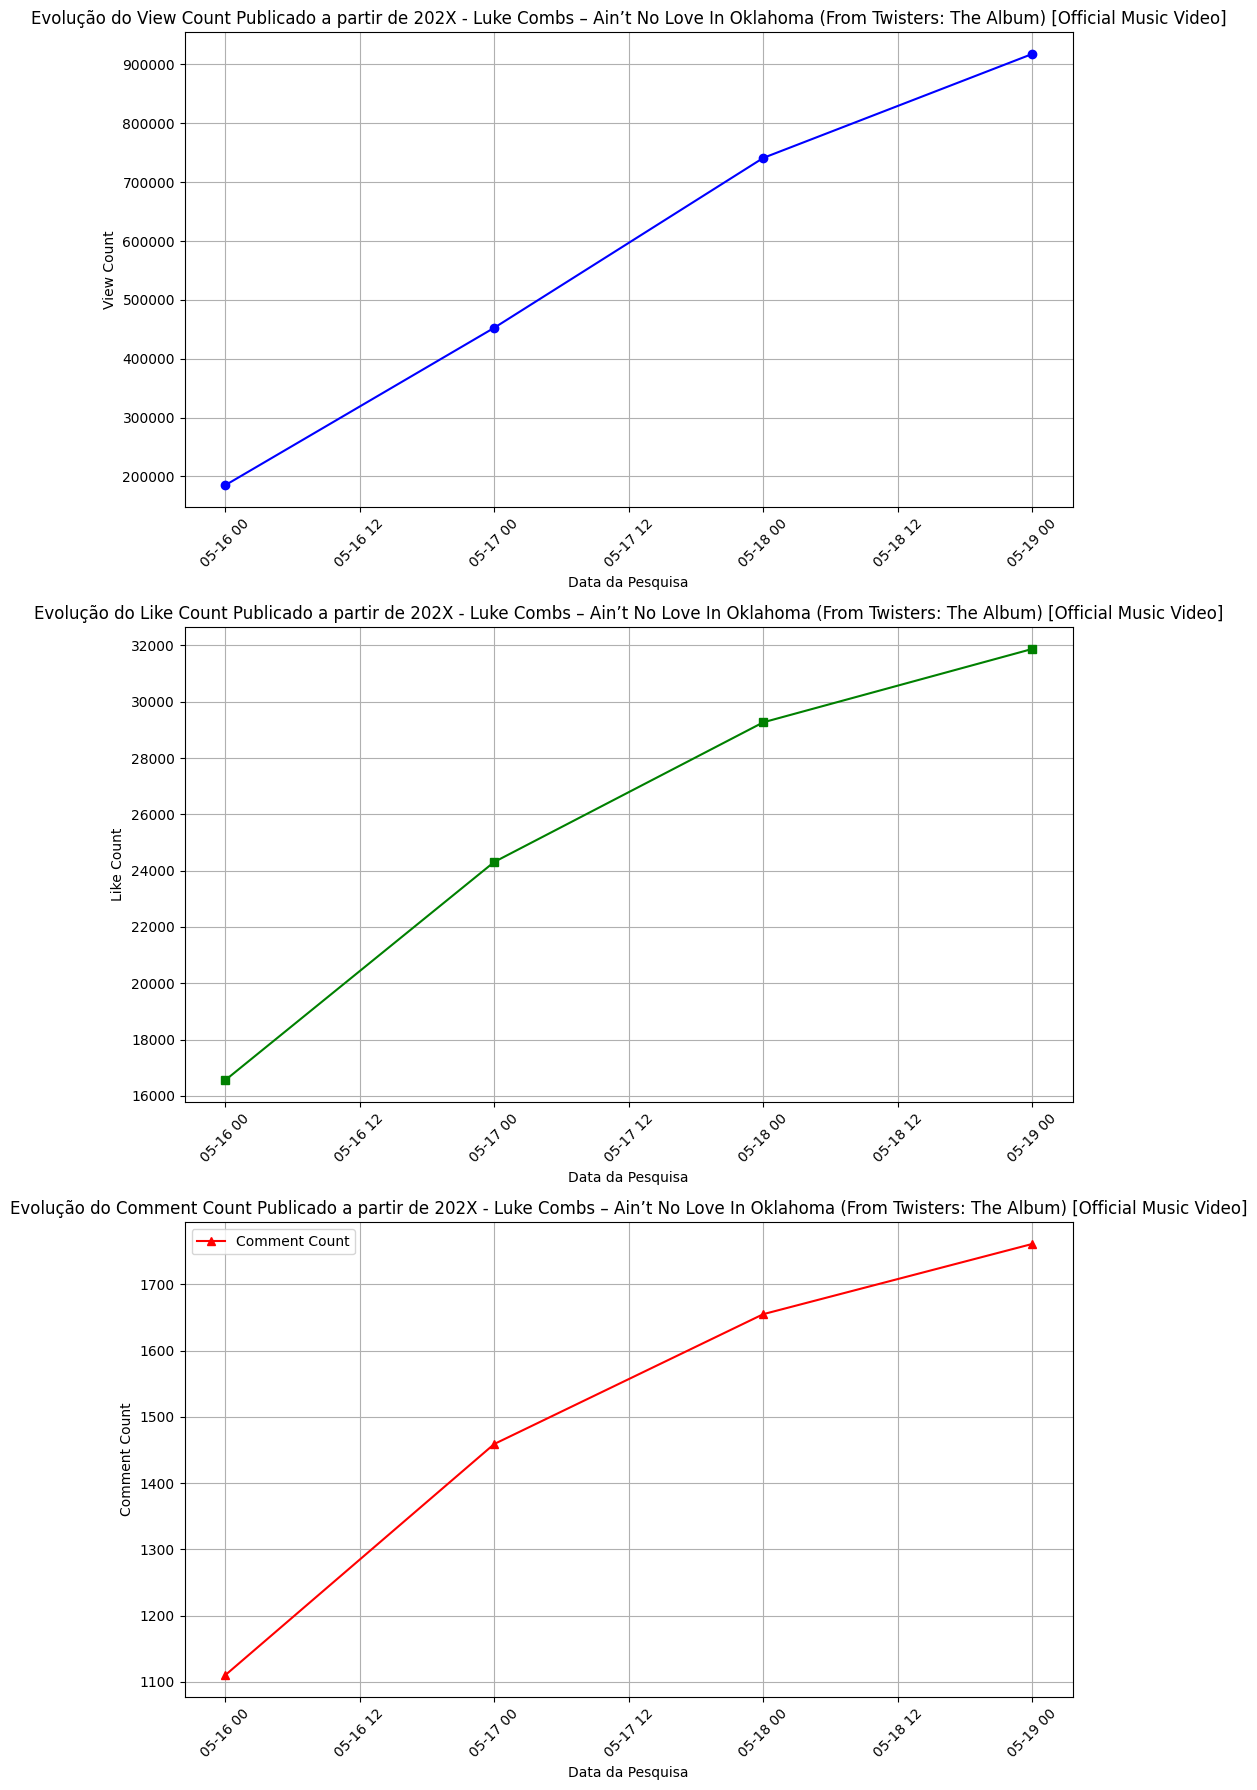

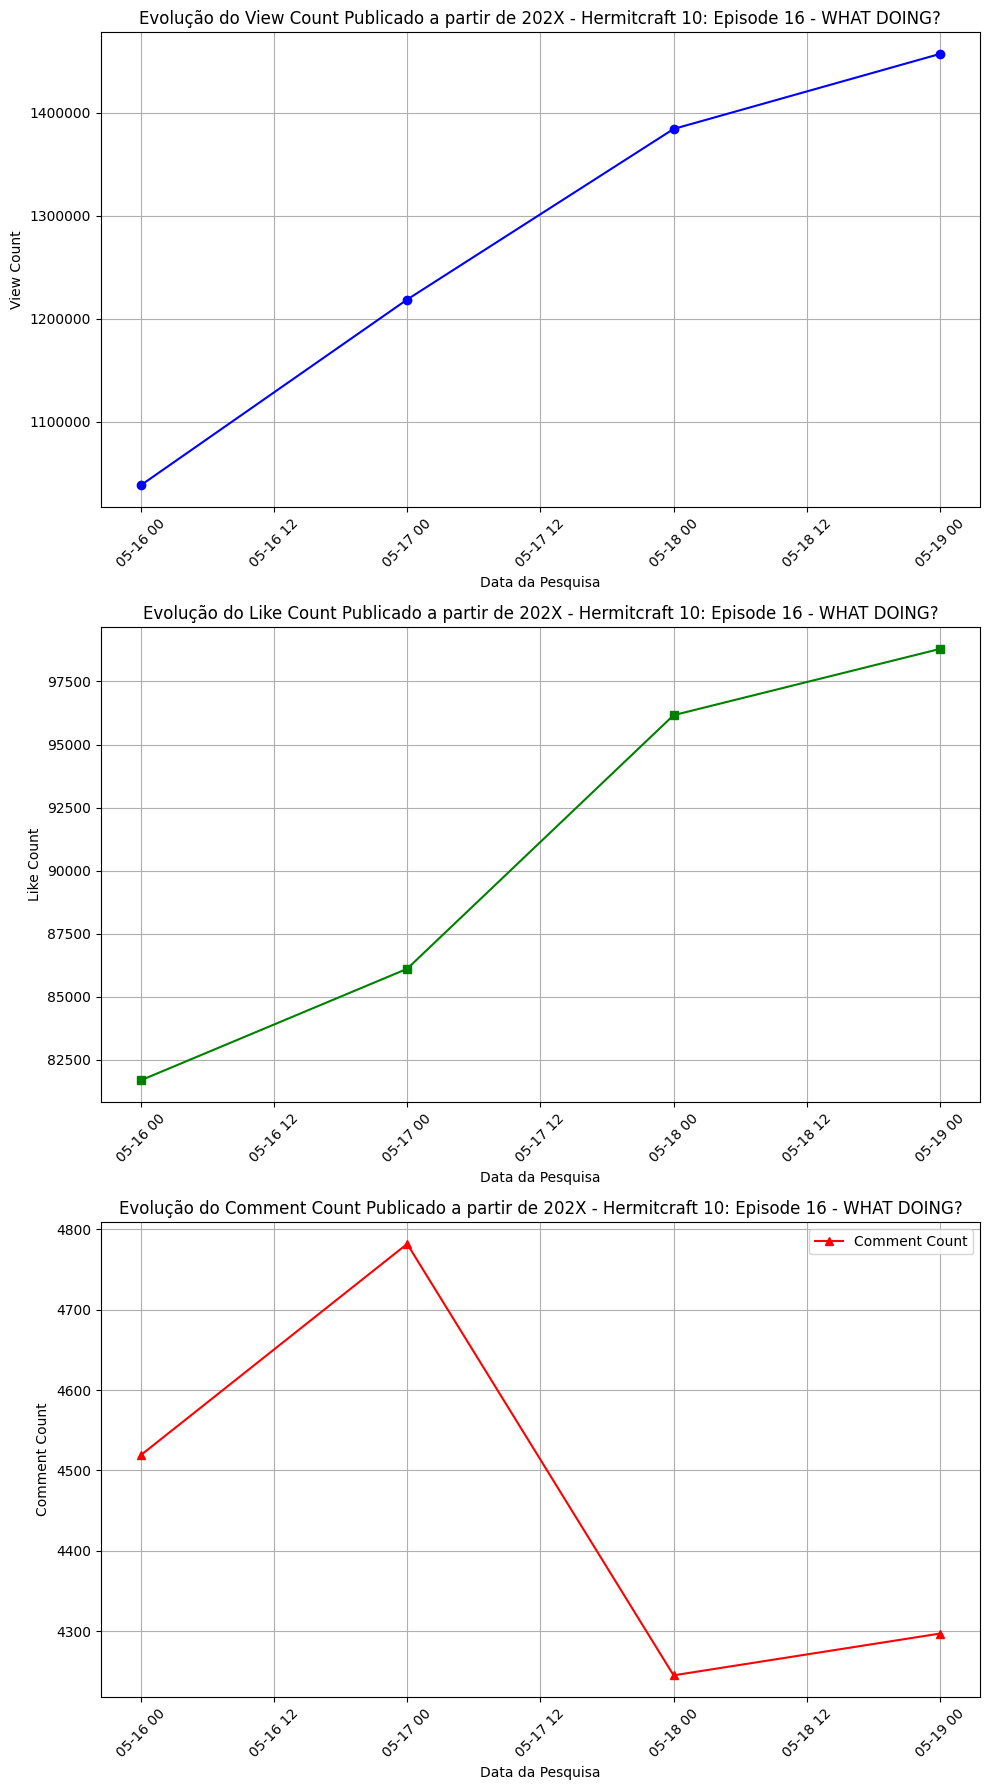

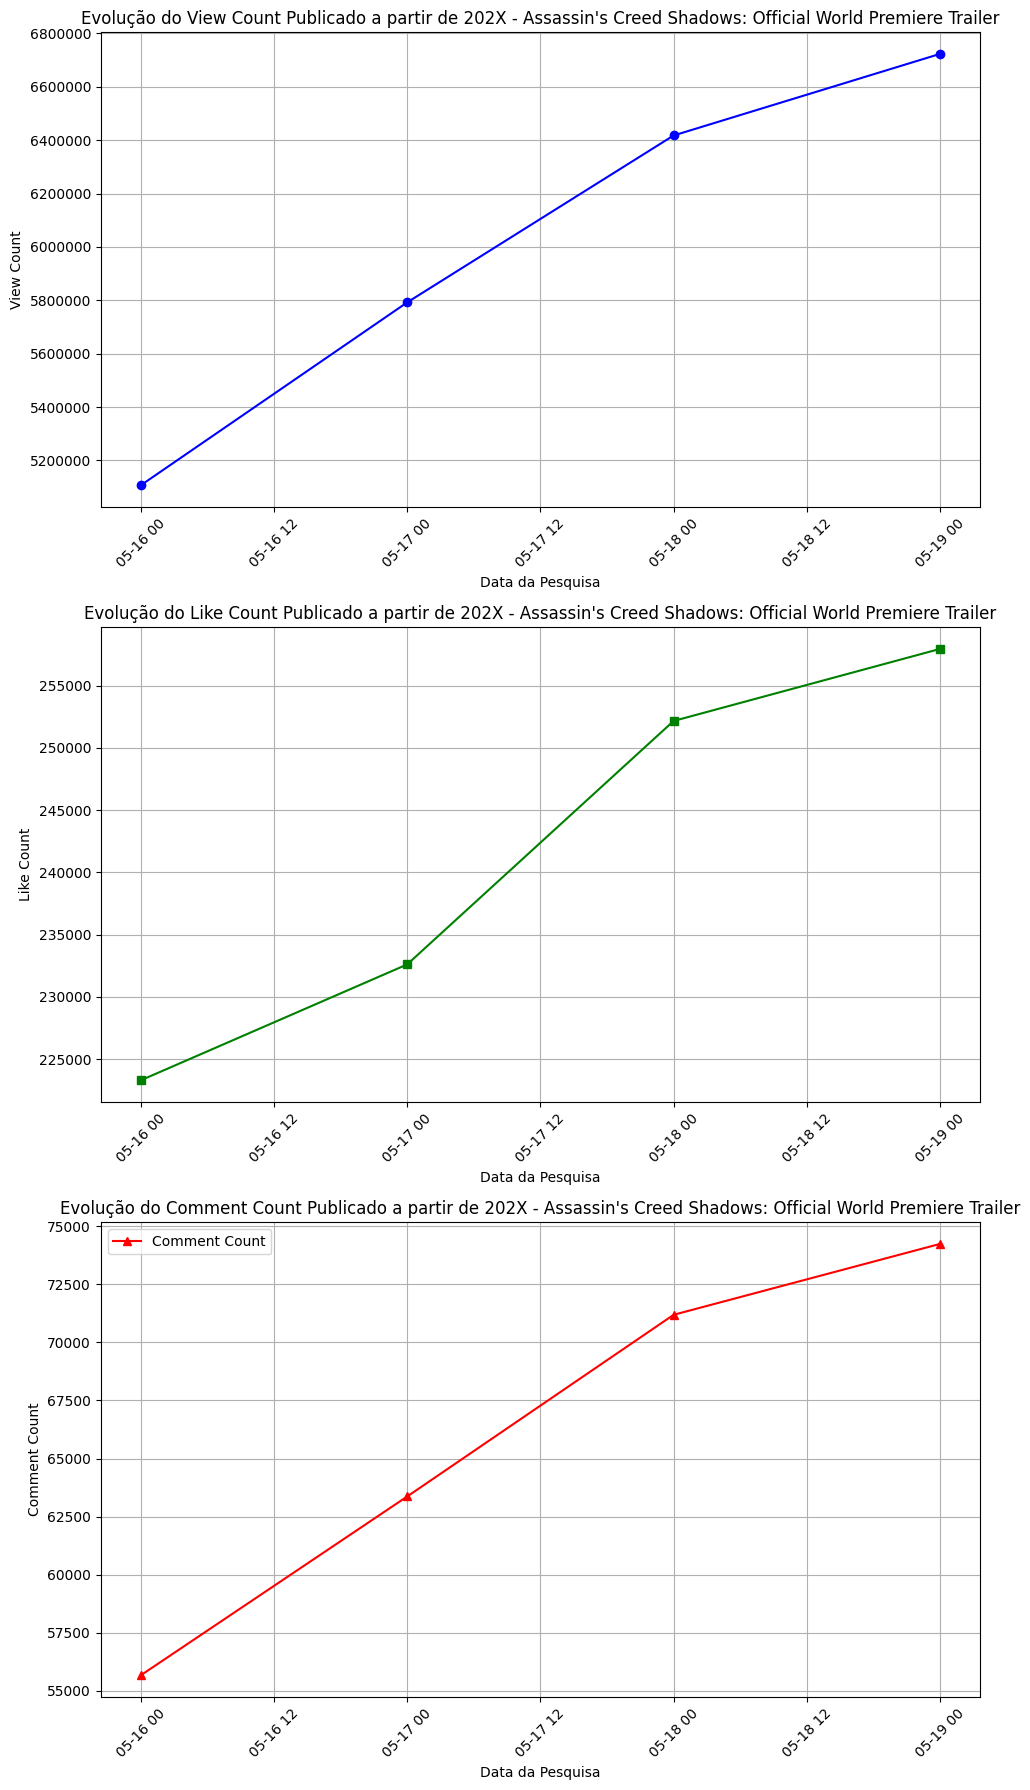

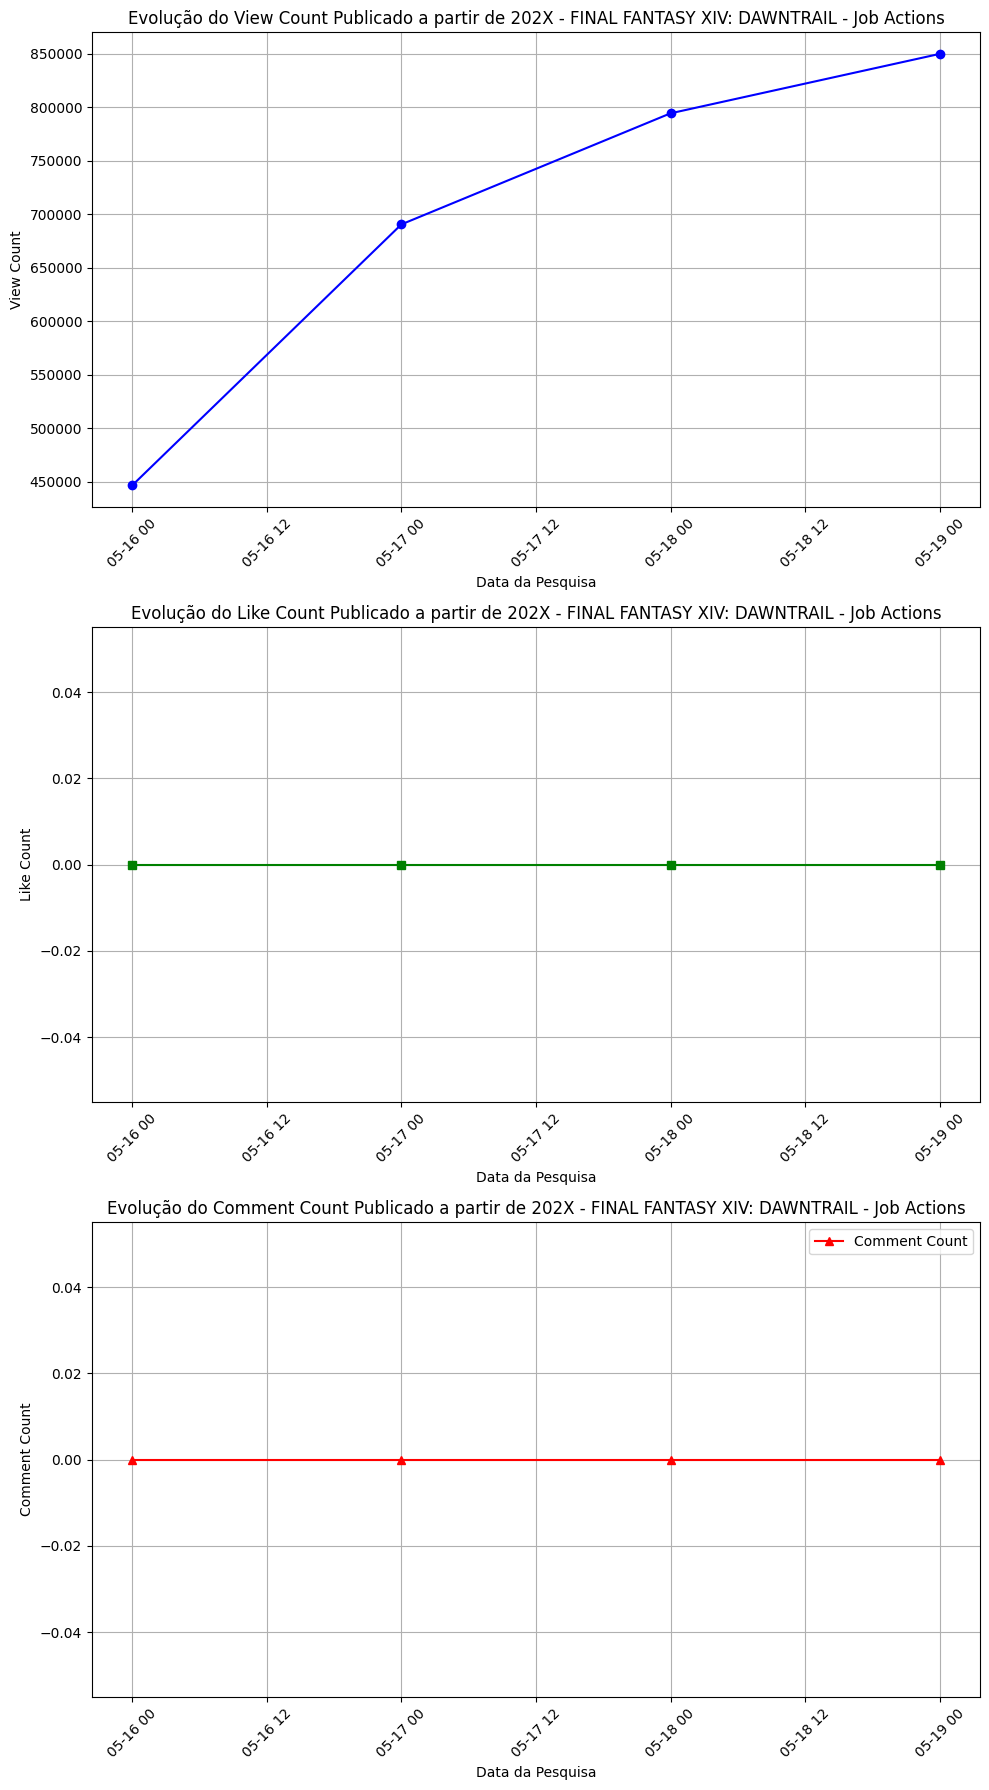

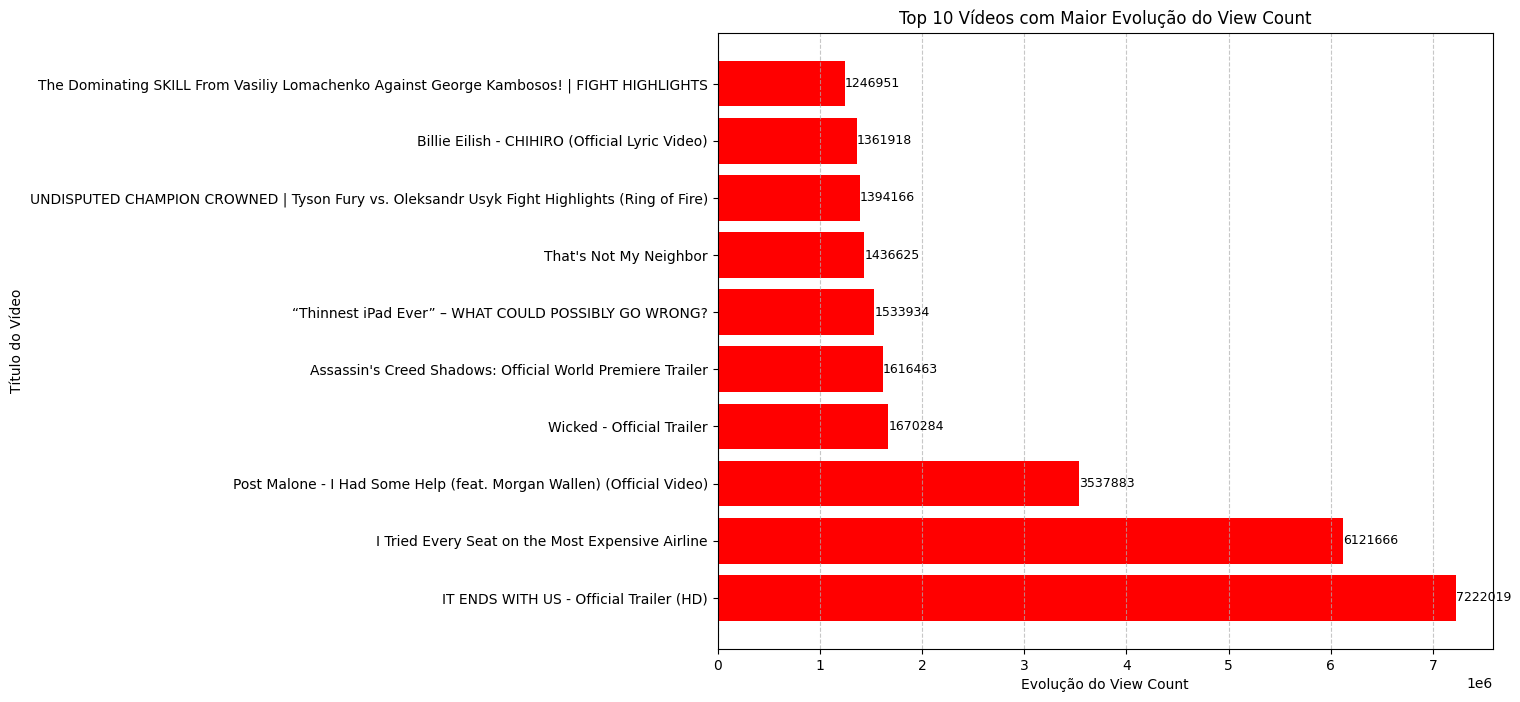

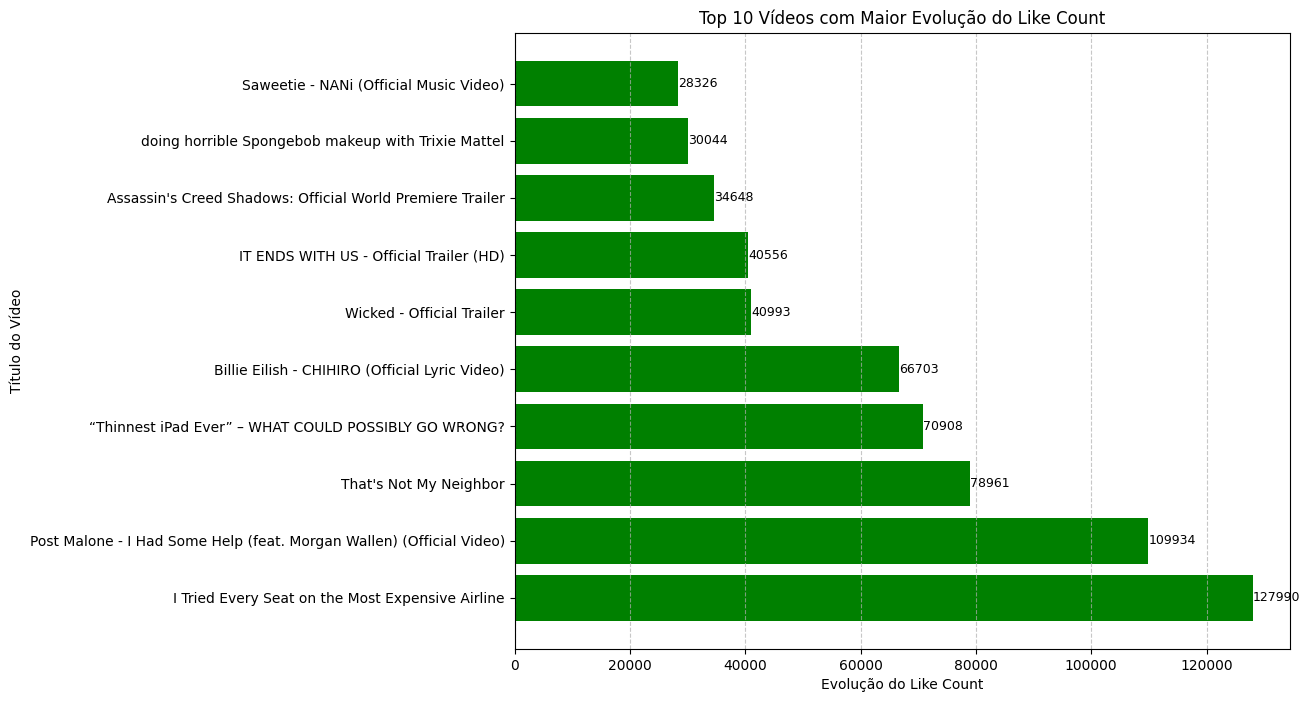

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Carregar CSV
df = pd.read_csv("\\Users\\T-GAMER\\Desktop\\ProjetoWhatsHype\\videos_populares.csv")

# Converter 'Data da Pesquisa' e 'Published At' para datetime
df['Data da Pesquisa'] = pd.to_datetime(df['Data da Pesquisa'], format='%d/%m/%Y')
df['Published At'] = pd.to_datetime(df['Published At'])

def plot_video_evolution(group_df, title_suffix=''):
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))

    metrics = ['View Count', 'Like Count', 'Comment Count']
    colors = ['blue', 'green', 'red']
    markers = ['o', 's', '^']
    for ax, metric, color, marker in zip(axes, metrics, colors, markers):
        ax.plot(group_df['Data da Pesquisa'], group_df[metric], marker=marker, linestyle='-', color=color, label=metric)
        ax.set_title(f'Evolução do {metric} {title_suffix}')
        ax.set_xlabel('Data da Pesquisa')
        ax.set_ylabel(metric)
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        # Desativa a formatação científica para o eixo y
        ax.yaxis.get_major_formatter().set_scientific(False)

    plt.legend()
    plt.tight_layout()
    plt.show()

# 10 VIDEOS QUE MAIS APARECEM NA LISTA - EVOLUÇÃO DO VIEW, LIKE E COMMENT COUNT
top_10_videos = df['Video ID'].value_counts().nlargest(10).index
df_top_10_videos = df[df['Video ID'].isin(top_10_videos)].sort_values(by='Data da Pesquisa')

for video_id, group_df in df_top_10_videos.groupby('Video ID'):
    plot_video_evolution(group_df, f'- {group_df["Title"].iloc[0]}')

# 10 VÍDEOS COM MAIS VISUALIZAÇÕES PUBLICADOS A PARTIR DE 202X
df_202X = df[df['Published At'].dt.year >= 2022]
top_10_videos_202X = df_202X['Video ID'].value_counts().nlargest(10).index
df_top_10_videos_202X = df_202X[df_202X['Video ID'].isin(top_10_videos_202X)].sort_values(by='Data da Pesquisa')

for video_id, group_df in df_top_10_videos_202X.groupby('Video ID'):
    plot_video_evolution(group_df, f'Publicado a partir de 202X - {group_df["Title"].iloc[0]}')
    
# 10 VÍDEOS COM A MAIOR EVOLUÇÃO DE VIEW COUNT E LIKE COUNT

# 20 vídeos que mais aparecem na lista - ISSO FOI UMA IDEIA PARA INCLUIR ENTRADAS DE VÍDEOS QUE APARECEREAM MENOS MAS MESMO ASSIM POSSUEM DADOS RELEVANTES
top_20_videos = df['Video ID'].value_counts().nlargest(20).index

# Calcular a evolução do View Count para cada um dos 20 vídeos
evolucao_view_count = {}
for video_id in top_20_videos:
    video_data = df[df['Video ID'] == video_id]
    oldest_entry = video_data['View Count'].iloc[0]
    newest_entry = video_data['View Count'].iloc[-1]
    evolucao_view_count[video_id] = newest_entry - oldest_entry

# Selecionar os 10 vídeos com maior evolução de View Count
view_evolucao = sorted(evolucao_view_count, key=evolucao_view_count.get, reverse=True)[:10]

# Plotar gráfico de barras relacionando o valor da evolução do View Count com o título dos vídeos
plt.figure(figsize=(10, 8))
videos_titles = [df[df['Video ID'] == video_id]['Title'].iloc[0] for video_id in view_evolucao]
values = [evolucao_view_count[video_id] for video_id in view_evolucao]
# Criando uma escala de cores para as barras
bars = plt.barh(videos_titles, values, color='red')

# Adicionar os valores ao lado direito das barras
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), va='center', ha='left', fontsize=9)

plt.xlabel('Evolução do View Count')
plt.ylabel('Título do Vídeo')
plt.title('Top 10 Vídeos com Maior Evolução do View Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Calcular a evolução do Like Count para cada um dos 20 vídeos
evolucao_like_count = {}
for video_id in top_20_videos:
    video_data = df[df['Video ID'] == video_id]
    oldest_entry = video_data['Like Count'].iloc[0]
    newest_entry = video_data['Like Count'].iloc[-1]
    evolucao_like_count[video_id] = newest_entry - oldest_entry

# Selecionar os 10 vídeos com maior evolução de Like Count
like_evolucao = sorted(evolucao_like_count, key=evolucao_like_count.get, reverse=True)[:10]

# Plotar gráfico de barras relacionando o valor da evolução do Like Count com o título dos vídeos
plt.figure(figsize=(10, 8))
videos_titles = [df[df['Video ID'] == video_id]['Title'].iloc[0] for video_id in like_evolucao]
values = [evolucao_like_count[video_id] for video_id in like_evolucao]
# Criando uma escala de cores para as barras
bars = plt.barh(videos_titles, values, color='green')

# Adicionar os valores ao lado direito das barras
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), va='center', ha='left', fontsize=9)

plt.xlabel('Evolução do Like Count')
plt.ylabel('Título do Vídeo')
plt.title('Top 10 Vídeos com Maior Evolução do Like Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()